In [63]:
import os
import psycopg2
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'


In [4]:
# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
host = os.getenv("HOST")
port = os.getenv("PORT")
database = os.getenv("DATABASE")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASS")

# Construct the connection string
connection_string = f"host={host} port={port} dbname={database} user={user} password={password}"

In [5]:
# Connect to the PostgreSQL database
try:
    connection = psycopg2.connect(connection_string)
    cursor = connection.cursor()
    print("Connected to the PostgreSQL database!")

    # Execute queries
    query = "SELECT * FROM cons_by_district;"
    cursor.execute(query)
    raw_data = cursor.fetchall()

    # Don't forget to close the cursor and connection when done
    cursor.close()
    connection.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)

Connected to the PostgreSQL database!


In [6]:
# Convert fetched data into df
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(raw_data, columns=column_names)
df = df.sort_values(by=['id','YYMM'])
df

id province_code  province_name amphur_code  amphur_name  \
10521      1            10  กรุงเทพมหานคร          01       พระนคร   
3          2            10  กรุงเทพมหานคร          01       พระนคร   
4          3            10  กรุงเทพมหานคร          01       พระนคร   
5          4            10  กรุงเทพมหานคร          01       พระนคร   
6          5            10  กรุงเทพมหานคร          01       พระนคร   
...      ...           ...            ...         ...          ...   
10516  10761            10  กรุงเทพมหานคร          20   บางกอกน้อย   
10517  10762            10  กรุงเทพมหานคร          21  บางขุนเทียน   
10518  10763            10  กรุงเทพมหานคร          32       ประเวศ   
10519  10764            10  กรุงเทพมหานคร          35       จอมทอง   
10520  10765            10  กรุงเทพมหานคร          40        บางแค   

      class_group_code class_group_name  consumption       YYMM status  
10521                2         BUSINESS       249666 2022-01-01      1  
3                    3         INDUSTRY         7204 2022-01-01      1  
4                    4        ENTERTAIN        38717 2022-01-01      1  
5                    5       GOVERNMENT        47321 2022-01-01      1  
6                    6      INSTITUTION         4709 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10516                4        ENTERTAIN        62583 2021-10-01      1  
10517                8              MWA          222 2021-10-01      1  
10518                2         BUSINESS       513405 2021-10-01      1  
10519                7        CONSTRUCT        21439 2021-10-01      1  
10520                4        ENTERTAIN        64320 2021-10-01      1  

[10765 rows x 10 columns]

In [7]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

id province_code  province_name amphur_code  amphur_name  \
10521      1            10  กรุงเทพมหานคร          01       พระนคร   
3          2            10  กรุงเทพมหานคร          01       พระนคร   
4          3            10  กรุงเทพมหานคร          01       พระนคร   
5          4            10  กรุงเทพมหานคร          01       พระนคร   
6          5            10  กรุงเทพมหานคร          01       พระนคร   
...      ...           ...            ...         ...          ...   
10516  10761            10  กรุงเทพมหานคร          20   บางกอกน้อย   
10517  10762            10  กรุงเทพมหานคร          21  บางขุนเทียน   
10518  10763            10  กรุงเทพมหานคร          32       ประเวศ   
10519  10764            10  กรุงเทพมหานคร          35       จอมทอง   
10520  10765            10  กรุงเทพมหานคร          40        บางแค   

      class_group_code class_group_name  consumption       YYMM status  
10521                2         BUSINESS       249666 2022-01-01      1  
3                    3         INDUSTRY         7204 2022-01-01      1  
4                    4        ENTERTAIN        38717 2022-01-01      1  
5                    5       GOVERNMENT        47321 2022-01-01      1  
6                    6      INSTITUTION         4709 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10516                4        ENTERTAIN        62583 2021-10-01      1  
10517                8              MWA          222 2021-10-01      1  
10518                2         BUSINESS       513405 2021-10-01      1  
10519                7        CONSTRUCT        21439 2021-10-01      1  
10520                4        ENTERTAIN        64320 2021-10-01      1  

[10765 rows x 10 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 10521 to 10520
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10765 non-null  int64         
 1   province_code     10581 non-null  object        
 2   province_name     10581 non-null  object        
 3   amphur_code       10581 non-null  object        
 4   amphur_name       10559 non-null  object        
 5   class_group_code  10765 non-null  object        
 6   class_group_name  10765 non-null  object        
 7   consumption       10765 non-null  int64         
 8   YYMM              10765 non-null  datetime64[ns]
 9   status            10765 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 925.1+ KB


In [9]:
df[df['province_code'].isna() | df['province_name'].isna() | df['amphur_code'].isna() | df['amphur_name'].isna()]

id province_code province_name amphur_code amphur_name  \
156      160           NaN           NaN         NaN         NaN   
268      270           NaN           NaN         NaN         NaN   
355      363            11   สมุทรปราการ         NaN         NaN   
356      409           NaN           NaN          34         NaN   
357      410           NaN           NaN         NaN         NaN   
...      ...           ...           ...         ...         ...   
10074  10312           NaN           NaN         NaN         NaN   
10217  10455            11   สมุทรปราการ         NaN         NaN   
10291  10538           NaN           NaN         NaN         NaN   
10436  10689           NaN           NaN         NaN         NaN   
10509  10753           NaN           NaN         NaN         NaN   

      class_group_code class_group_name  consumption       YYMM status  
156                  3         INDUSTRY         8265 2022-02-01      1  
268                  4        ENTERTAIN         4118 2022-02-01      1  
355                  1        RESIDENCE           45 2022-01-01      1  
356                  1        RESIDENCE          138 2022-01-01      1  
357                  1        RESIDENCE       433733 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10074                4        ENTERTAIN        11810 2022-09-01      1  
10217                1        RESIDENCE           45 2022-11-01      1  
10291                8              MWA         3760 2022-12-01      1  
10436                5       GOVERNMENT      1775464 2021-11-01      1  
10509                5       GOVERNMENT      1725553 2021-10-01      1  

[206 rows x 10 columns]

In [10]:
cleaned_df = df.dropna(subset=['province_code','amphur_code'],how='any')
cleaned_df = cleaned_df.sort_values(by=['YYMM','province_code','amphur_code','id'])
cleaned_df

id province_code  province_name amphur_code amphur_name  \
5397   5533            10  กรุงเทพมหานคร          01      พระนคร   
5398   5534            10  กรุงเทพมหานคร          01      พระนคร   
5399   5535            10  กรุงเทพมหานคร          01      พระนคร   
10577  5536            10  กรุงเทพมหานคร          01      พระนคร   
10578  5580            10  กรุงเทพมหานคร          01      พระนคร   
...     ...           ...            ...         ...         ...   
9058   9230            13       ปทุมธานี          06     ลำลูกกา   
5309   5429            24     ฉะเชิงเทรา           4     บางปะกง   
5310   5430            24     ฉะเชิงเทรา           4     บางปะกง   
9019   9231            24     ฉะเชิงเทรา           4     บางปะกง   
5372   5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption       YYMM status  
5397                 4        ENTERTAIN        33640 2021-10-01      1  
5398                 5       GOVERNMENT        46032 2021-10-01      1  
5399                 6      INSTITUTION         4042 2021-10-01      1  
10577                7        CONSTRUCT         3210 2021-10-01      1  
10578                2         BUSINESS       232488 2021-10-01      1  
...                ...              ...          ...        ...    ...  
9058                 2         BUSINESS         1909 2023-07-01      1  
5309                 1        RESIDENCE          937 2023-07-01      1  
5310                 2         BUSINESS           57 2023-07-01      1  
9019                 7        CONSTRUCT         8906 2023-07-01      1  
5372                 1        RESIDENCE          230 2023-07-01      1  

[10559 rows x 10 columns]

In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10559 entries, 5397 to 5372
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10559 non-null  int64         
 1   province_code     10559 non-null  object        
 2   province_name     10559 non-null  object        
 3   amphur_code       10559 non-null  object        
 4   amphur_name       10559 non-null  object        
 5   class_group_code  10559 non-null  object        
 6   class_group_name  10559 non-null  object        
 7   consumption       10559 non-null  int64         
 8   YYMM              10559 non-null  datetime64[ns]
 9   status            10559 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 907.4+ KB


In [12]:
cleaned_df.describe()

id   consumption
count  10559.000000  1.055900e+04
mean    5384.557250  2.273641e+05
std     3108.749101  4.207141e+05
min        1.000000  0.000000e+00
25%     2692.500000  1.111150e+04
50%     5382.000000  4.424700e+04
75%     8068.500000  2.539620e+05
max    10765.000000  4.293764e+06

In [13]:
cleaned_df[cleaned_df['class_group_code'] == '1']

id province_code  province_name amphur_code amphur_name  \
8031    8213            10  กรุงเทพมหานคร          01      พระนคร   
10459  10705            10  กรุงเทพมหานคร          02       ดุสิต   
10466  10706            10  กรุงเทพมหานคร          03     หนองจอก   
10470  10708            10  กรุงเทพมหานคร          05      บางเขน   
10473  10709            10  กรุงเทพมหานคร          06     บางกะปิ   
...      ...           ...            ...         ...         ...   
5362    5419            12        นนทบุรี          06    ปากเกร็ด   
9016    9225            12        นนทบุรี           4   บางบัวทอง   
5368    5425            13       ปทุมธานี          06     ลำลูกกา   
5309    5429            24     ฉะเชิงเทรา           4     บางปะกง   
5372    5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption       YYMM status  
8031                 1        RESIDENCE       164415 2021-10-01      1  
10459                1        RESIDENCE       377069 2021-10-01      1  
10466                1        RESIDENCE      1121186 2021-10-01      1  
10470                1        RESIDENCE      1322439 2021-10-01      1  
10473                1        RESIDENCE      1213654 2021-10-01      1  
...                ...              ...          ...        ...    ...  
5362                 1        RESIDENCE      2012161 2023-07-01      1  
9016                 1        RESIDENCE      2101903 2023-07-01      1  
5368                 1        RESIDENCE        30171 2023-07-01      1  
5309                 1        RESIDENCE          937 2023-07-01      1  
5372                 1        RESIDENCE          230 2023-07-01      1  

[1430 rows x 10 columns]

In [14]:
print(cleaned_df['class_group_code'].unique())
print(cleaned_df['class_group_name'].unique())

['4' '5' '6' '7' '2' '1' '3' '8']
['ENTERTAIN' 'GOVERNMENT' 'INSTITUTION' 'CONSTRUCT' 'BUSINESS' 'RESIDENCE'
 'INDUSTRY' 'MWA']


In [15]:
cleaned_df[cleaned_df['class_group_code'].isna() | cleaned_df['class_group_name'].isna()]

Empty DataFrame
Columns: [id, province_code, province_name, amphur_code, amphur_name, class_group_code, class_group_name, consumption, YYMM, status]
Index: []

In [16]:
print(cleaned_df['province_code'].value_counts())
print(cleaned_df['province_name'].value_counts())

10    8336
11    1013
12    1012
13     110
24      66
73      22
Name: province_code, dtype: int64
กรุงเทพมหานคร    8336
สมุทรปราการ      1013
นนทบุรี          1012
ปทุมธานี          110
ฉะเชิงเทรา         66
นครปฐม             22
Name: province_name, dtype: int64


In [17]:
print(cleaned_df['province_code'].value_counts())
print(cleaned_df['province_name'].value_counts())

10    8336
11    1013
12    1012
13     110
24      66
73      22
Name: province_code, dtype: int64
กรุงเทพมหานคร    8336
สมุทรปราการ      1013
นนทบุรี          1012
ปทุมธานี          110
ฉะเชิงเทรา         66
นครปฐม             22
Name: province_name, dtype: int64


In [18]:
print(cleaned_df['amphur_name'].value_counts())

จตุจักร        176
บางพลัด        176
บางซื่อ        176
บางกรวย        176
ประเวศ         176
              ... 
สัมพันธวงศ์    149
สายไหม         132
ลำลูกกา        110
บางปะกง         66
พุทธมณฑล        22
Name: amphur_name, Length: 65, dtype: int64


In [19]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects.patches:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

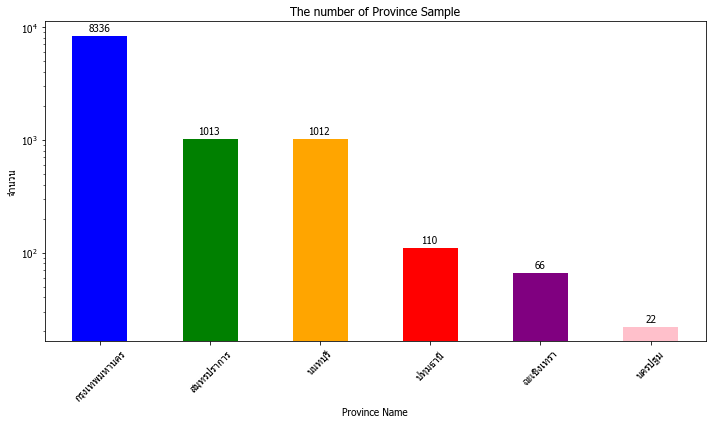

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
pv_name = cleaned_df['province_name'].unique()
pv_counts= cleaned_df['province_name'].value_counts()
bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar',color=bar_colors)
autolabel(bars)
plt.title('The number of Province Sample')
plt.xlabel('Province Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()

plt.show()

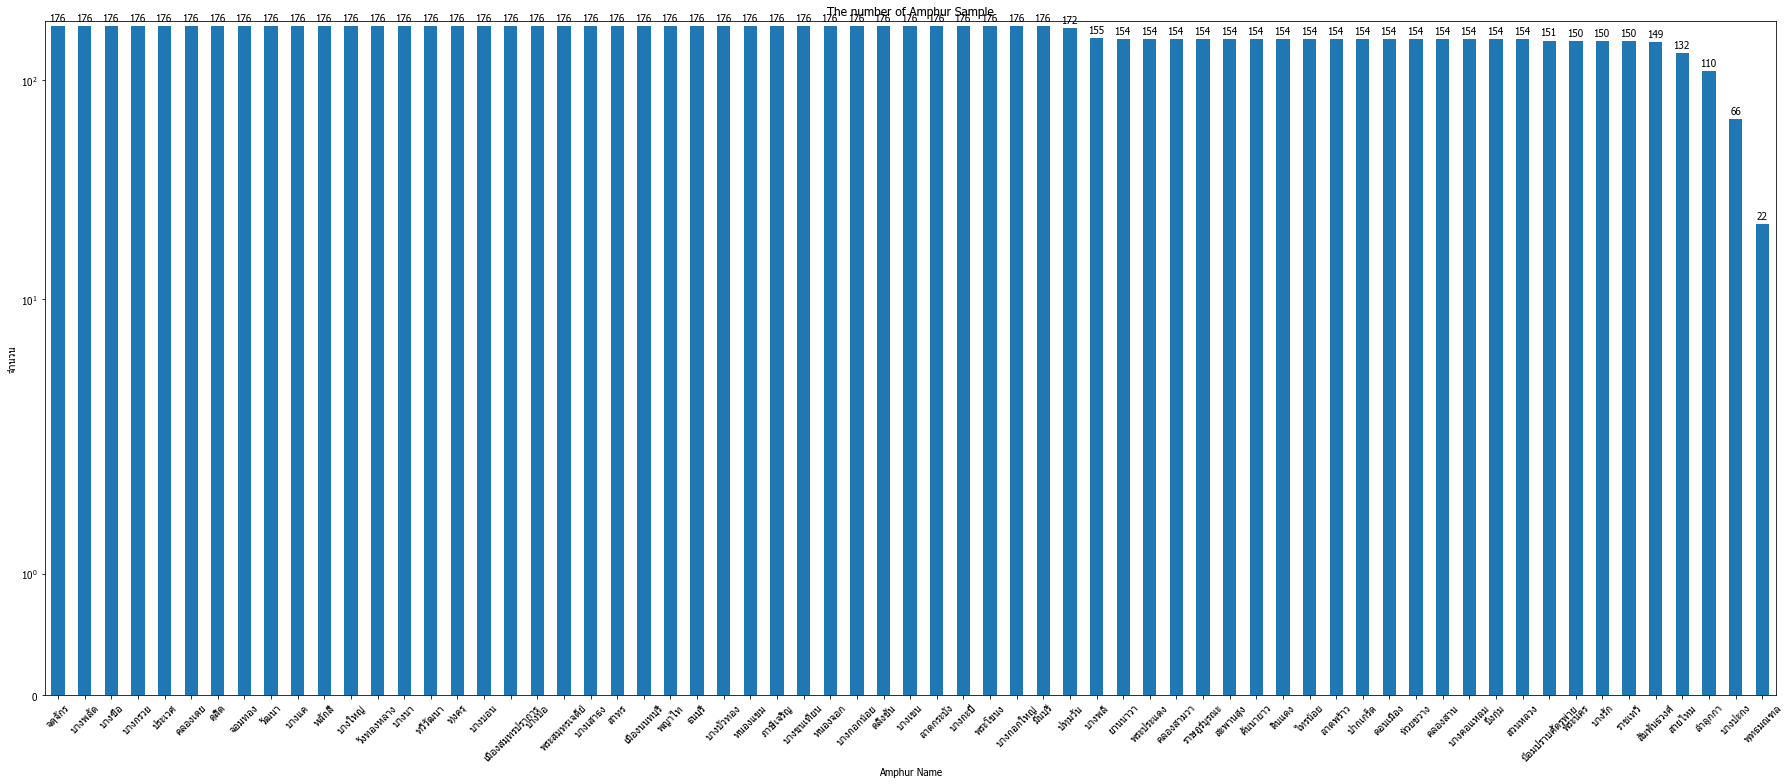

In [21]:
fig, ax = plt.subplots(figsize=(25, 11))
pv_name = cleaned_df['amphur_name'].unique()
pv_counts= cleaned_df['amphur_name'].value_counts()
# bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar')
autolabel(bars)
plt.title('The number of Amphur Sample')
plt.xlabel('Amphur Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('symlog')
plt.tight_layout()

plt.show()

In [22]:
cleaned_df['YYMM'] = pd.to_datetime(cleaned_df['YYMM'], format='%Y-%m-%d', errors='coerce')
# Filter out rows with NaT values (invalid dates)
cleaned_df = cleaned_df.dropna(subset=['YYMM'])
# Format the valid dates as 'mm/yy'
cleaned_df['YYMM'] = cleaned_df['YYMM'].dt.strftime("%m/%y")
cleaned_df

id province_code  province_name amphur_code amphur_name  \
5397   5533            10  กรุงเทพมหานคร          01      พระนคร   
5398   5534            10  กรุงเทพมหานคร          01      พระนคร   
5399   5535            10  กรุงเทพมหานคร          01      พระนคร   
10577  5536            10  กรุงเทพมหานคร          01      พระนคร   
10578  5580            10  กรุงเทพมหานคร          01      พระนคร   
...     ...           ...            ...         ...         ...   
9058   9230            13       ปทุมธานี          06     ลำลูกกา   
5309   5429            24     ฉะเชิงเทรา           4     บางปะกง   
5310   5430            24     ฉะเชิงเทรา           4     บางปะกง   
9019   9231            24     ฉะเชิงเทรา           4     บางปะกง   
5372   5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption   YYMM status  
5397                 4        ENTERTAIN        33640  10/21      1  
5398                 5       GOVERNMENT        46032  10/21      1  
5399                 6      INSTITUTION         4042  10/21      1  
10577                7        CONSTRUCT         3210  10/21      1  
10578                2         BUSINESS       232488  10/21      1  
...                ...              ...          ...    ...    ...  
9058                 2         BUSINESS         1909  07/23      1  
5309                 1        RESIDENCE          937  07/23      1  
5310                 2         BUSINESS           57  07/23      1  
9019                 7        CONSTRUCT         8906  07/23      1  
5372                 1        RESIDENCE          230  07/23      1  

[10559 rows x 10 columns]

Province กรุงเทพมหานคร
   1 : พระนคร
0 0 ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
BUSINESS       22
RESIDENCE      22
INDUSTRY       18
Name: class_group_name, dtype: int64
   2 : ดุสิต
0 1 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
MWA            22
CONSTRUCT      22
RESIDENCE      22
Name: class_group_name, dtype: int64
   3 : หนองจอก
0 2 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64
   4 : บางเขน
0 3 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
CONSTRUCT      22
MWA            22
RESIDENCE      22
INSTITUTION    22
Name: class_group_name, dtype: int64
   5 : บางกะปิ
1 0 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64

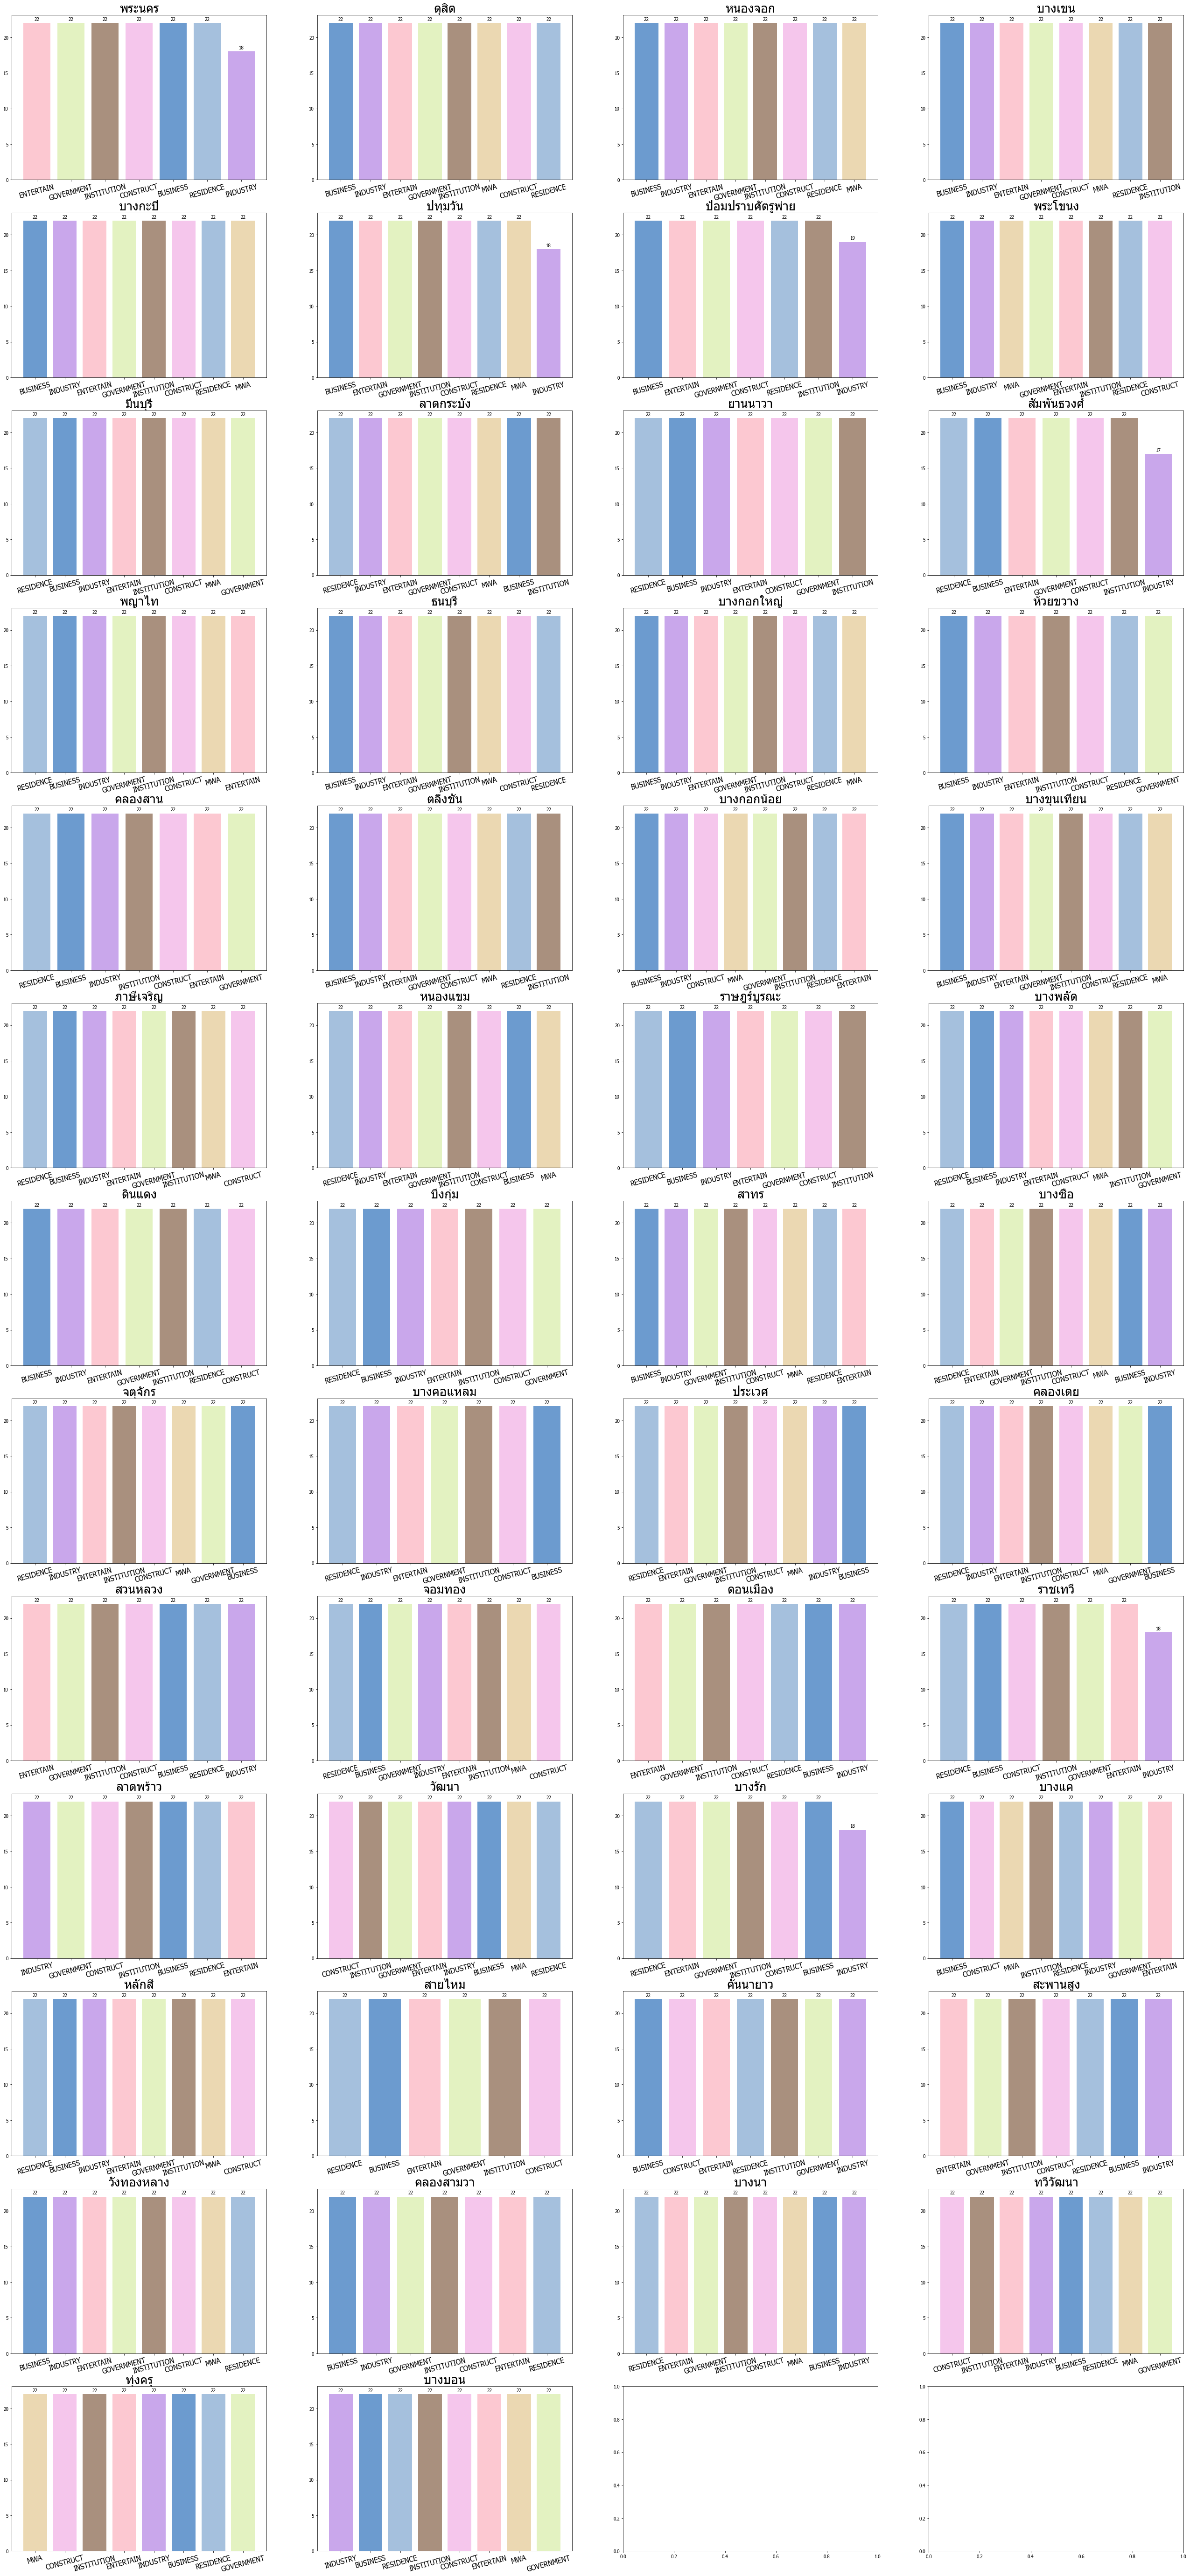

Province สมุทรปราการ
   1 : เมืองสมุทรปราการ
0 0 MWA            22
RESIDENCE      22
BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
INSTITUTION    22
CONSTRUCT      22
GOVERNMENT     22
Name: class_group_name, dtype: int64
   2 : บางบ่อ
0 1 RESIDENCE      22
BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
INSTITUTION    22
CONSTRUCT      22
MWA            22
GOVERNMENT     22
Name: class_group_name, dtype: int64
   3 : บางพลี
0 2 RESIDENCE      22
BUSINESS       22
INDUSTRY       22
INSTITUTION    22
CONSTRUCT      22
GOVERNMENT     22
ENTERTAIN      22
MWA             1
Name: class_group_name, dtype: int64
   4 : พระสมุทรเจดีย์
0 3 INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
BUSINESS       22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64
   5 : บางเสาธง
1 0 RESIDENCE      22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
MWA            22
BUSINESS       22
N

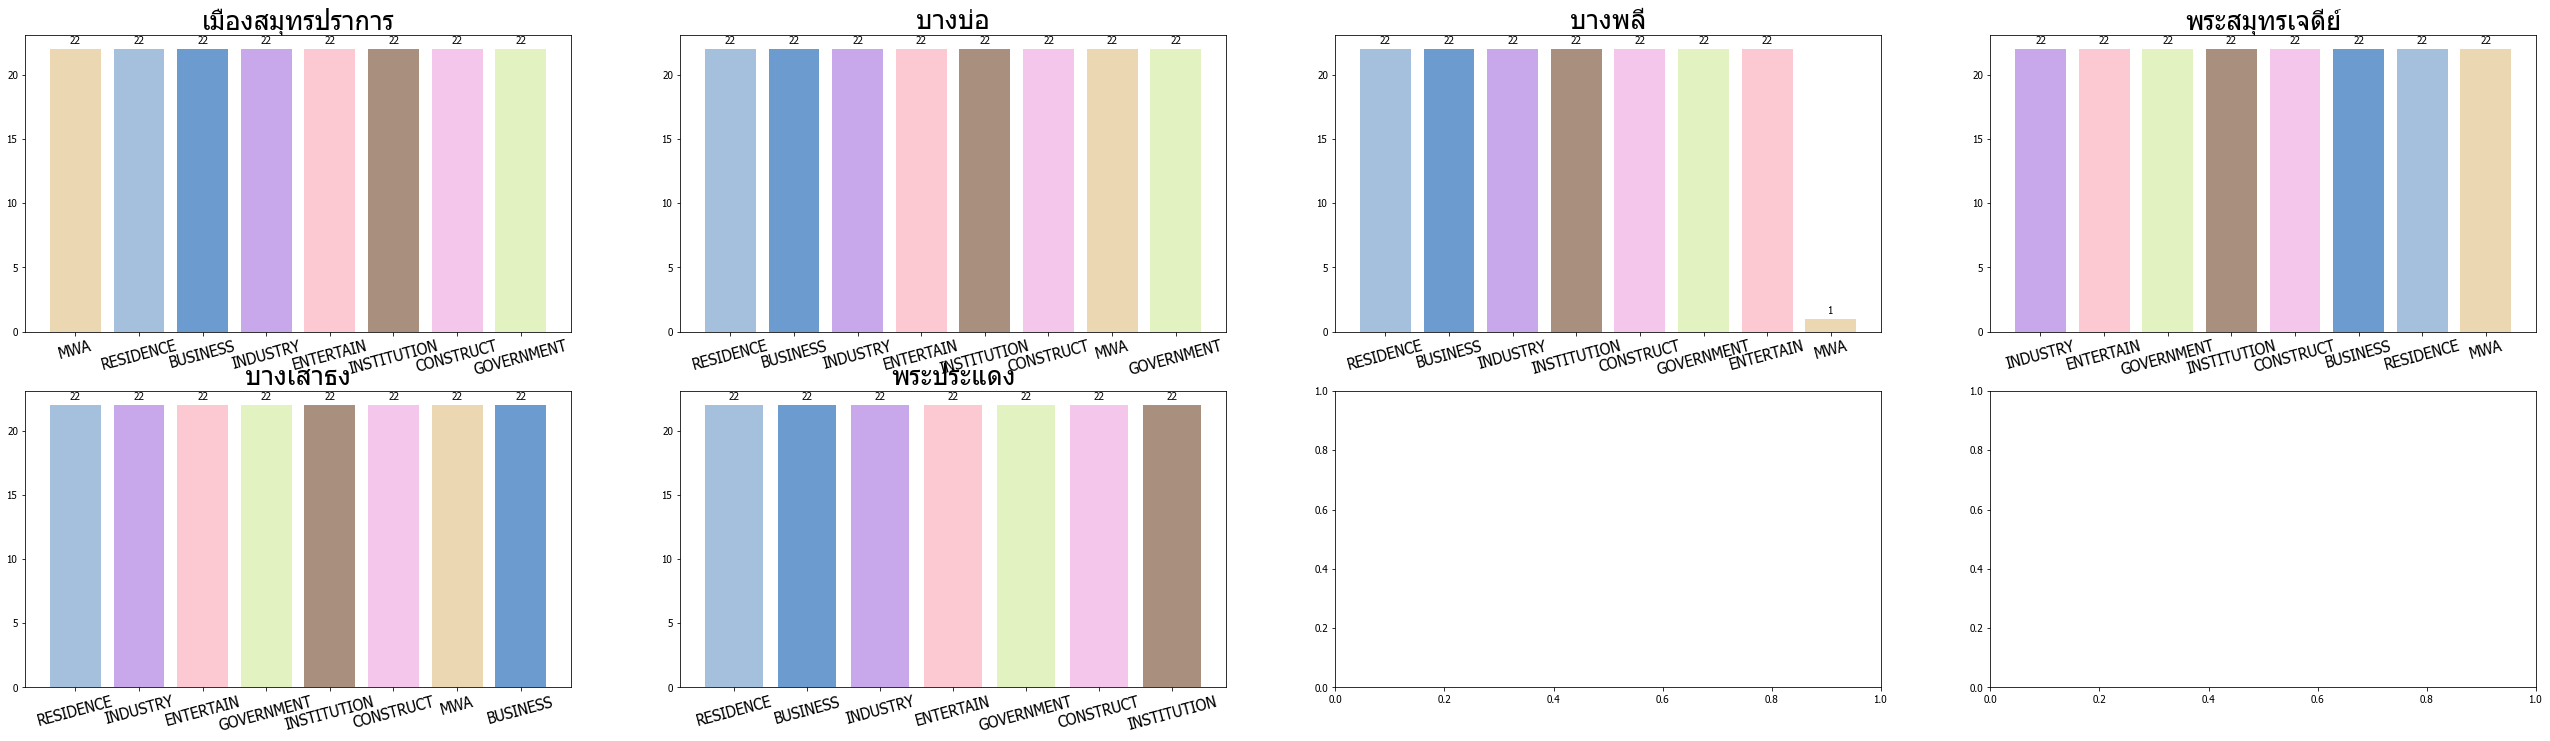

Province นนทบุรี
   1 : เมืองนนทบุรี
0 0 BUSINESS       22
INDUSTRY       22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
MWA            22
ENTERTAIN      22
RESIDENCE      22
Name: class_group_name, dtype: int64
   2 : บางกรวย
0 1 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
MWA            22
RESIDENCE      22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   3 : บางใหญ่
0 2 INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
CONSTRUCT      22
MWA            22
RESIDENCE      22
BUSINESS       22
INSTITUTION    22
Name: class_group_name, dtype: int64
   4 : ไทรน้อย
0 3 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
RESIDENCE      22
INSTITUTION    22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   5 : ปากเกร็ด
1 0 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
RESIDENCE      22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   6 : บางบัว

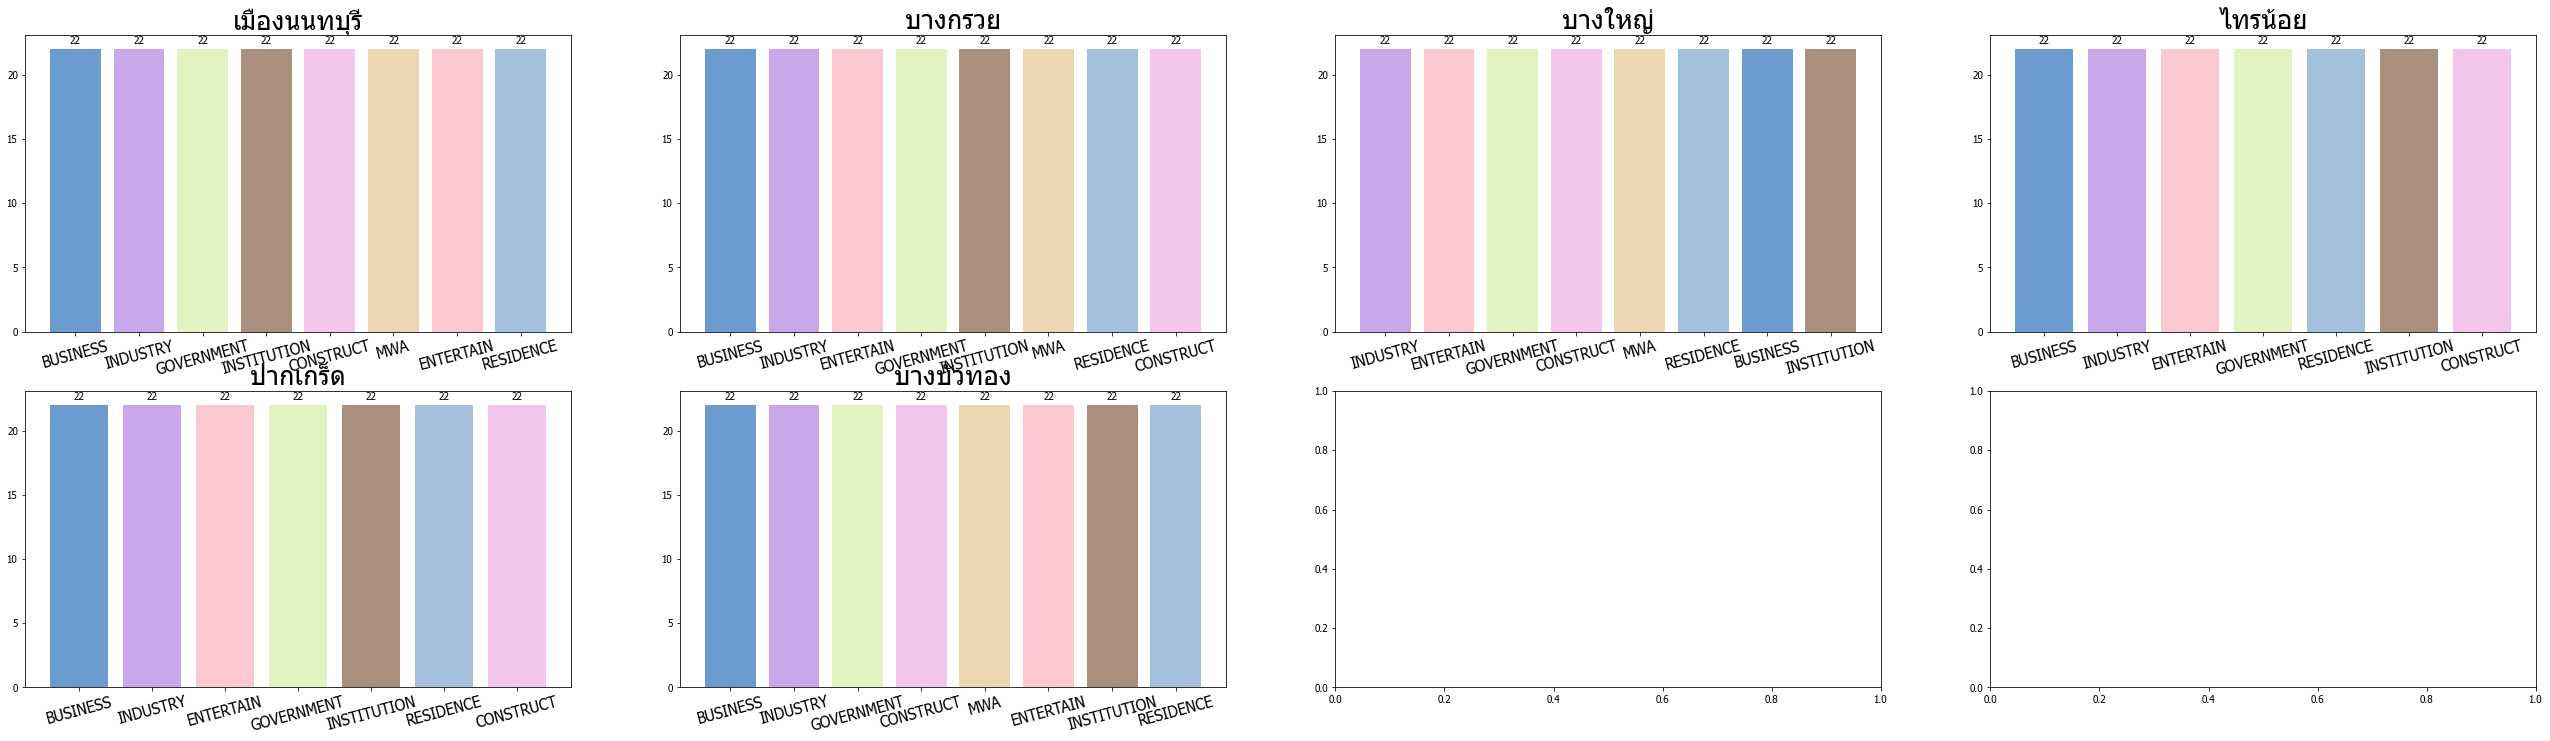

Province ปทุมธานี
   1 : ลำลูกกา
0 0 RESIDENCE      22
BUSINESS       22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
Name: class_group_name, dtype: int64


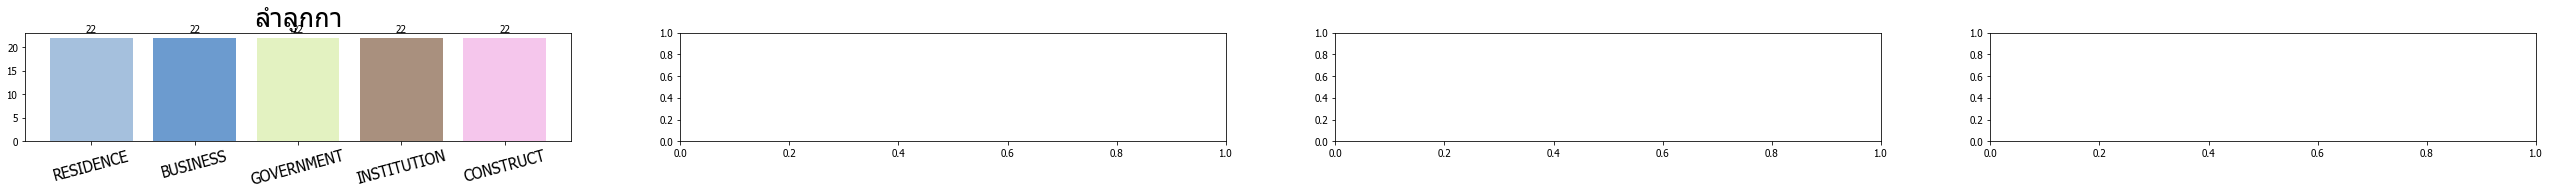

Province ฉะเชิงเทรา
   1 : บางปะกง
0 0 BUSINESS     22
CONSTRUCT    22
RESIDENCE    22
Name: class_group_name, dtype: int64


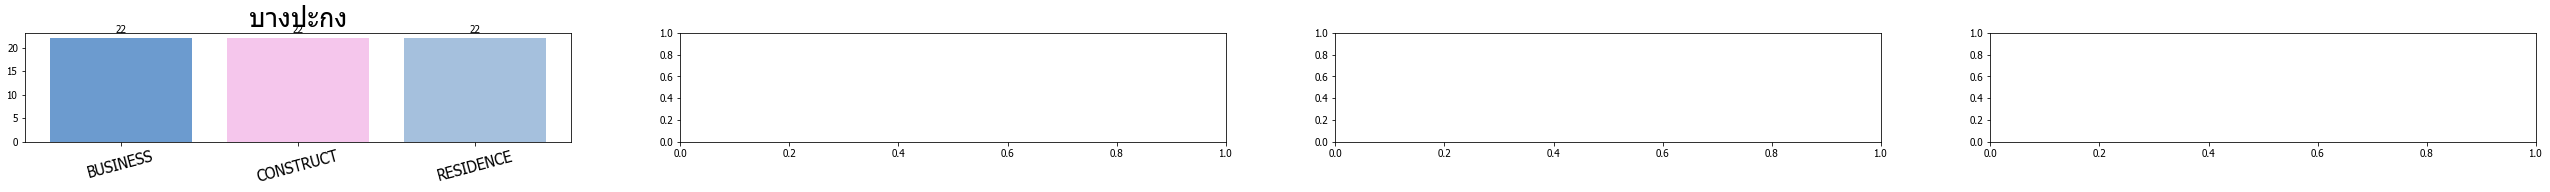

Province นครปฐม
   1 : พุทธมณฑล
0 0 RESIDENCE    22
Name: class_group_name, dtype: int64


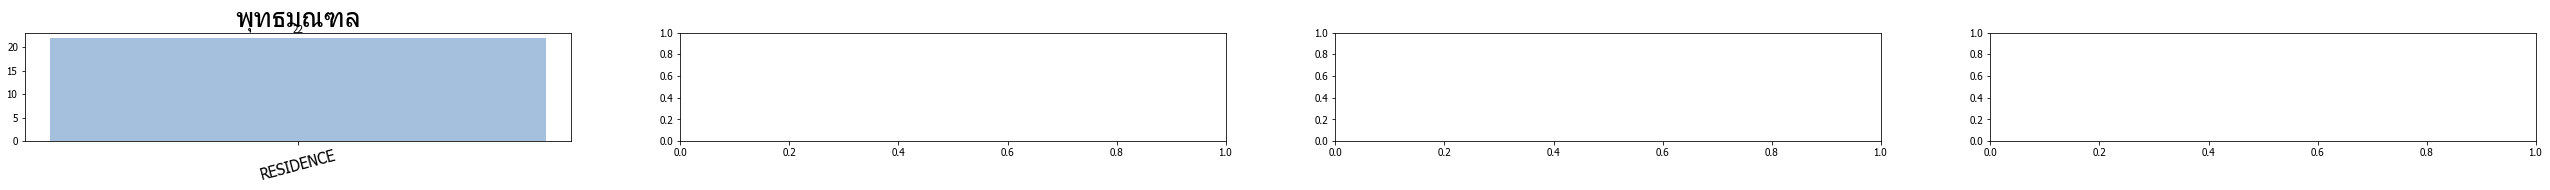

In [23]:
pv_name = cleaned_df['province_name'].unique()
col_per_row = 4
custom_colors = {
    'CONSTRUCT': '#F5C6EC',
    'INSTITUTION': '#A9907E',
    'ENTERTAIN': '#FCC8D1',
    'INDUSTRY': '#C9A7EB',
    'BUSINESS': '#6C9BCF',
    'RESIDENCE': '#A5C0DD',
    'MWA': '#EBD8B2',
    'GOVERNMENT': '#E3F2C1',
}
for p,pv in enumerate(pv_name):
    print("Province",pv)
    row=0
    ap_names = cleaned_df[cleaned_df['province_name']==pv]['amphur_name'].unique()
    ap_num = ap_names.shape[0]
    rows = math.ceil(ap_names.shape[0]/col_per_row)
    fig, ax = plt.subplots(rows,col_per_row,figsize=(45, ap_num*2))
    for a,ap in enumerate(ap_names):
        print("  ",a+1,":",ap)
        g_counts= cleaned_df[cleaned_df['amphur_name']==ap]['class_group_name'].value_counts()
        if a >= col_per_row-1 and a%col_per_row == 0:
            row+=1
        print(row,a%col_per_row,g_counts)
        
        # Calculate the current subplot index
        subplot_index = row * col_per_row + (a % col_per_row)

        # bars = ax[row,a%col_per_row].bar(g_counts.index,g_counts.values)
        # ax[row,a%col_per_row].set_title(ap)
        colors = [custom_colors[group] for group in g_counts.index]
        bars = ax.flat[subplot_index].bar(g_counts.index, g_counts.values, color=colors)
        ax.flat[subplot_index].set_title(ap, fontsize=26)
        for bar in bars:
            height = bar.get_height()
            # ax[row, a % col_per_row].annotate('{}'.format(height),
            ax.flat[subplot_index].annotate('{}'.format(height),
                                              xy=(bar.get_x() + bar.get_width() / 2, height),
                                              xytext=(0, 3),  # 3 points vertical offset
                                              textcoords="offset points",
                                              ha='center', va='bottom')
            
        ax.flat[subplot_index].tick_params(axis='x', labelrotation=15, labelsize=15)
    plt.show()
    # break

In [24]:
import seaborn as sns
# sns.set(font="tahoma")

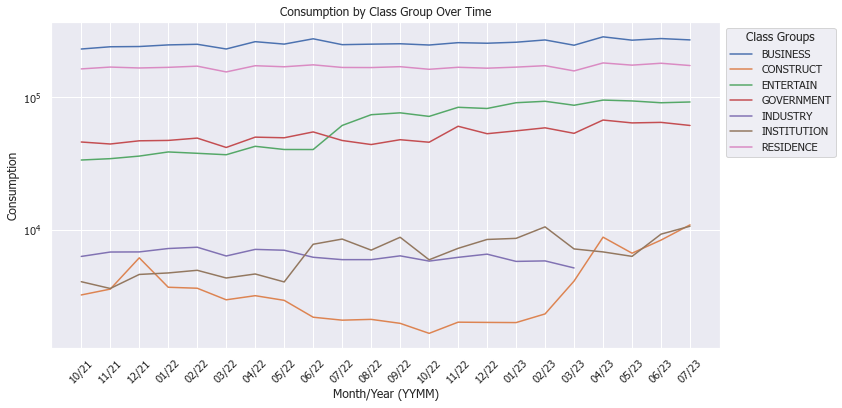

In [25]:
plt.figure(figsize=(12, 6))
# Use a loop to create a line for each class_group_code
for class_group_code, data in cleaned_df[(cleaned_df['province_name']=='กรุงเทพมหานคร')&(cleaned_df['amphur_name']=='พระนคร')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_code}')

plt.xlabel('Month/Year (YYMM)')
plt.ylabel('Consumption')
plt.yscale('log')
plt.title('Consumption by Class Group Over Time')
plt.legend(title='Class Groups', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

Province กรุงเทพมหานคร
   1 : พระนคร
0 0
   2 : ดุสิต
0 1
   3 : หนองจอก
0 2
   4 : บางเขน
0 3
   5 : บางกะปิ
1 0
   6 : ปทุมวัน
1 1
   7 : ป้อมปราบศัตรูพ่าย
1 2
   8 : พระโขนง
1 3
   9 : มีนบุรี
2 0
   10 : ลาดกระบัง
2 1
   11 : ยานนาวา
2 2
   12 : สัมพันธวงศ์
2 3
   13 : พญาไท
3 0
   14 : ธนบุรี
3 1
   15 : บางกอกใหญ่
3 2
   16 : ห้วยขวาง
3 3
   17 : คลองสาน
4 0
   18 : ตลิ่งชัน
4 1
   19 : บางกอกน้อย
4 2
   20 : บางขุนเทียน
4 3
   21 : ภาษีเจริญ
5 0
   22 : หนองแขม
5 1
   23 : ราษฎร์บูรณะ
5 2
   24 : บางพลัด
5 3
   25 : ดินแดง
6 0
   26 : บึงกุ่ม
6 1
   27 : สาทร
6 2
   28 : บางซื่อ
6 3
   29 : จตุจักร
7 0
   30 : บางคอแหลม
7 1
   31 : ประเวศ
7 2
   32 : คลองเตย
7 3
   33 : สวนหลวง
8 0
   34 : จอมทอง
8 1
   35 : ดอนเมือง
8 2
   36 : ราชเทวี
8 3
   37 : ลาดพร้าว
9 0
   38 : วัฒนา
9 1
   39 : บางรัก
9 2
   40 : บางแค
9 3
   41 : หลักสี่
10 0
   42 : สายไหม
10 1
   43 : คันนายาว
10 2
   44 : สะพานสูง
10 3
   45 : วังทองหลาง
11 0
   46 : คลองสามวา
11 1
   47 : บางนา
11 2
   48 : ทวีวัฒน

/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) 

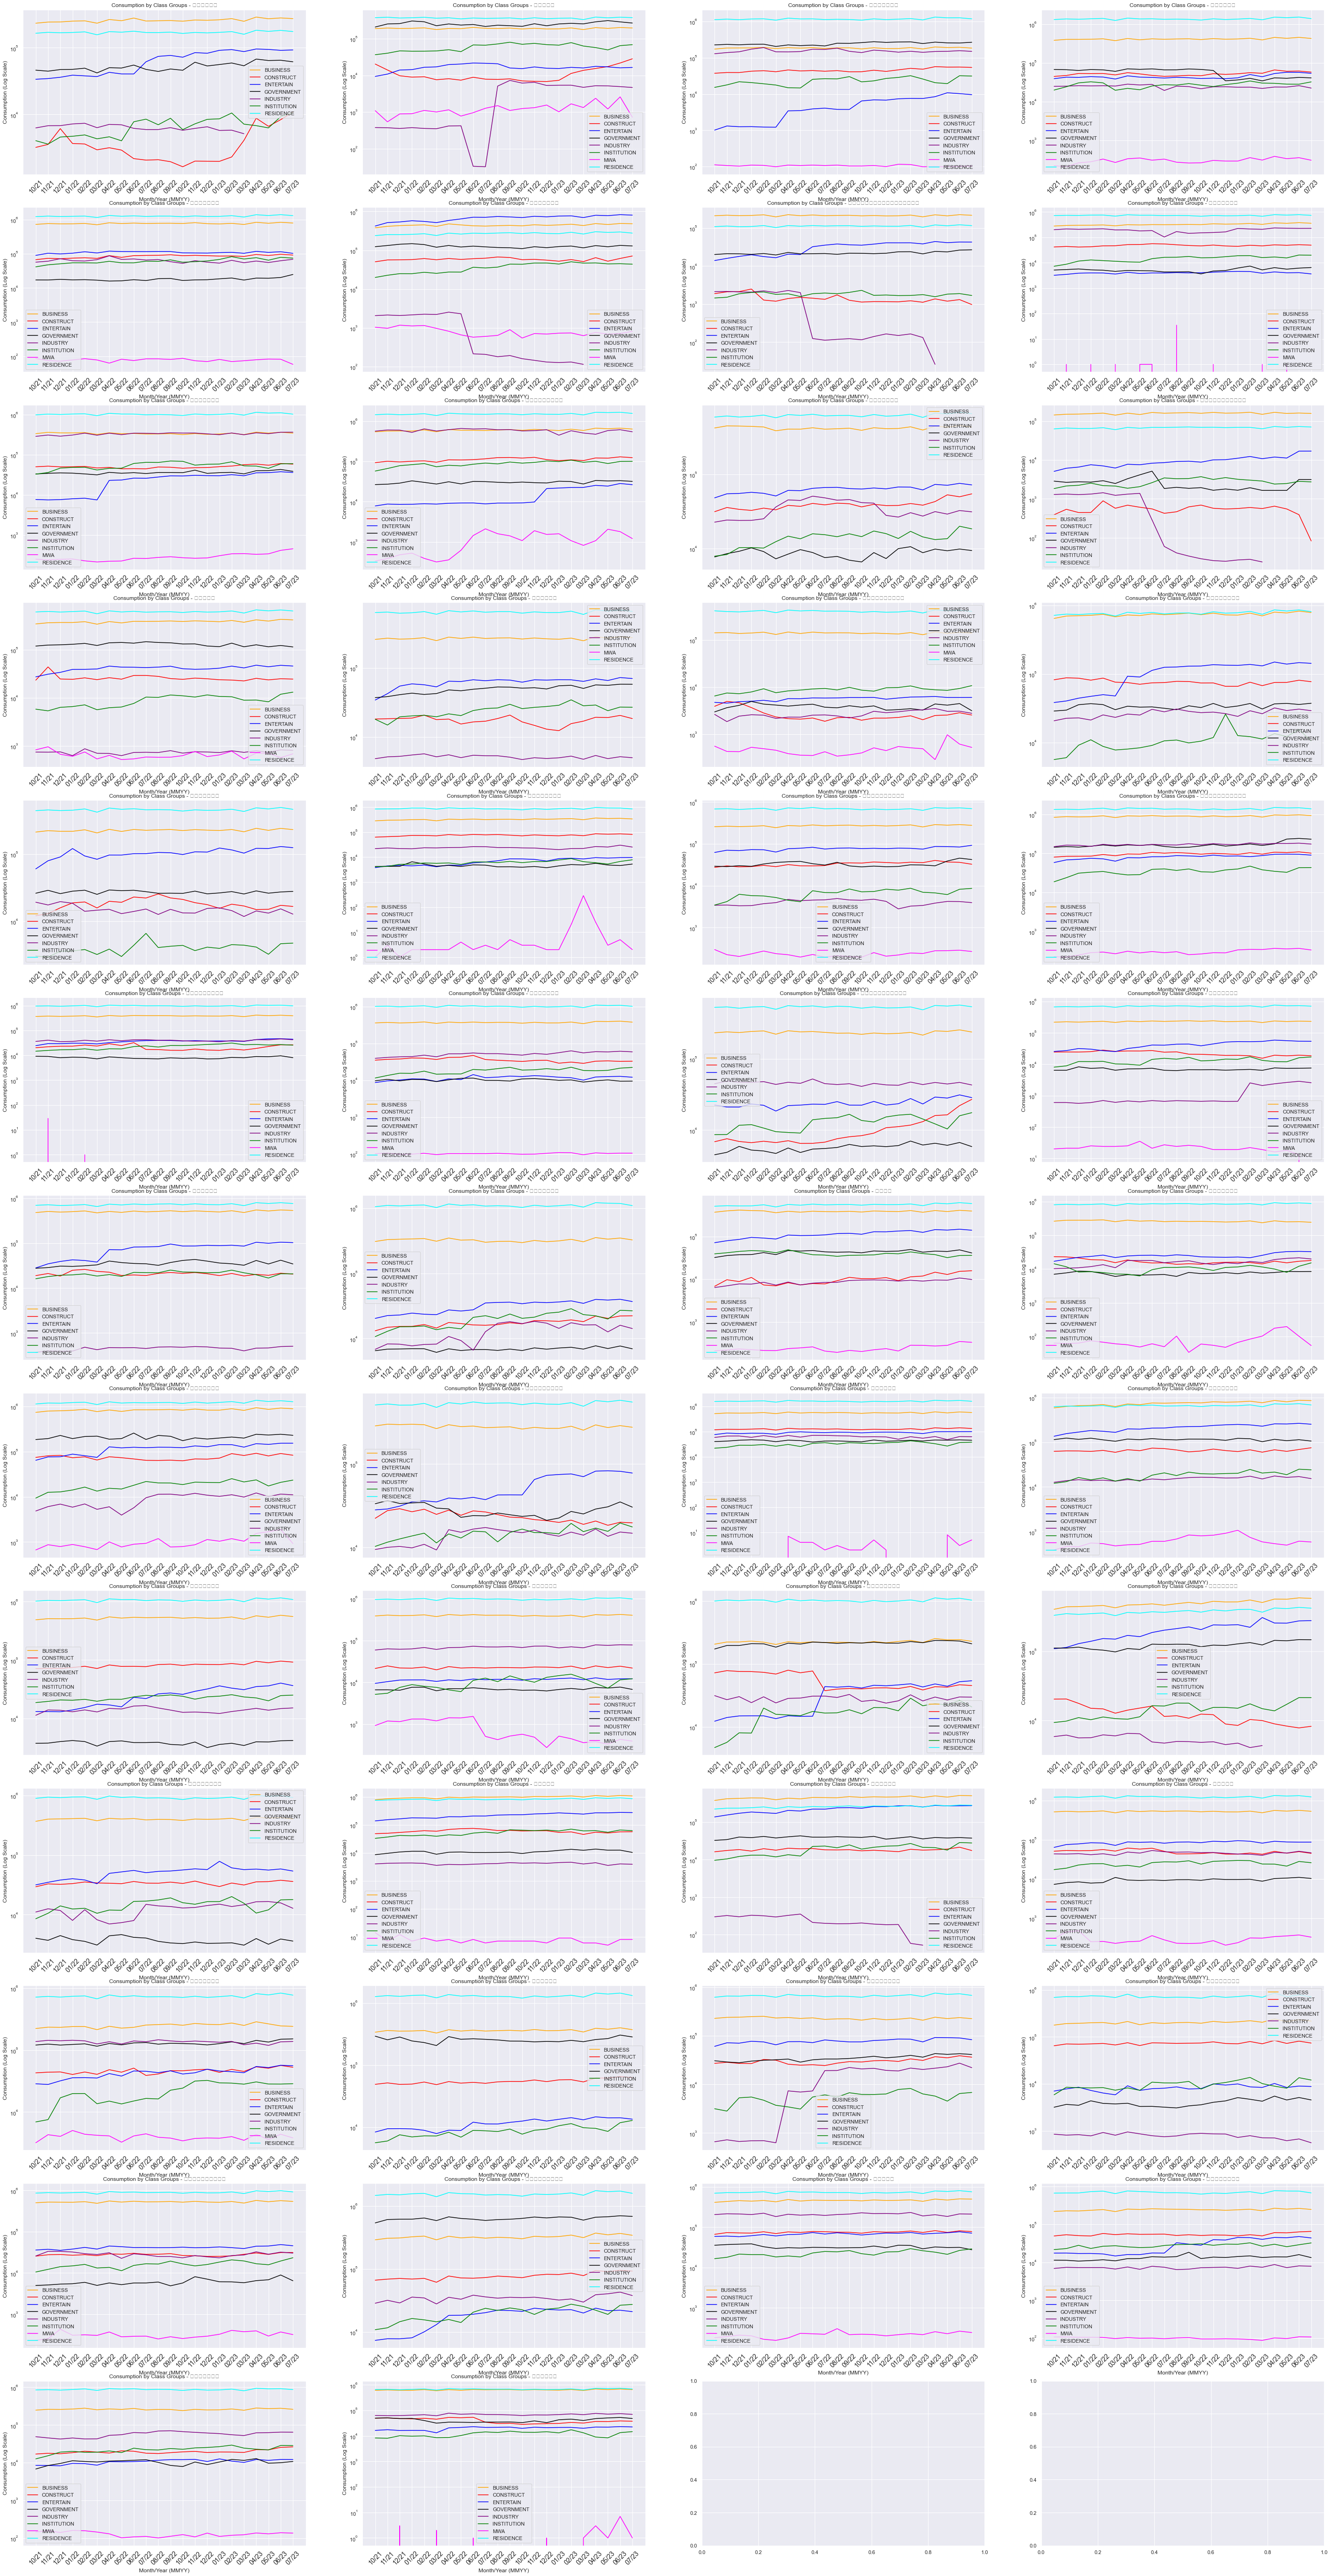

Province สมุทรปราการ
   1 : เมืองสมุทรปราการ
0 0
   2 : บางบ่อ
0 1
   3 : บางพลี
0 2
   4 : พระสมุทรเจดีย์
0 3
   5 : บางเสาธง
1 0
   6 : พระประแดง
1 1


/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) mis

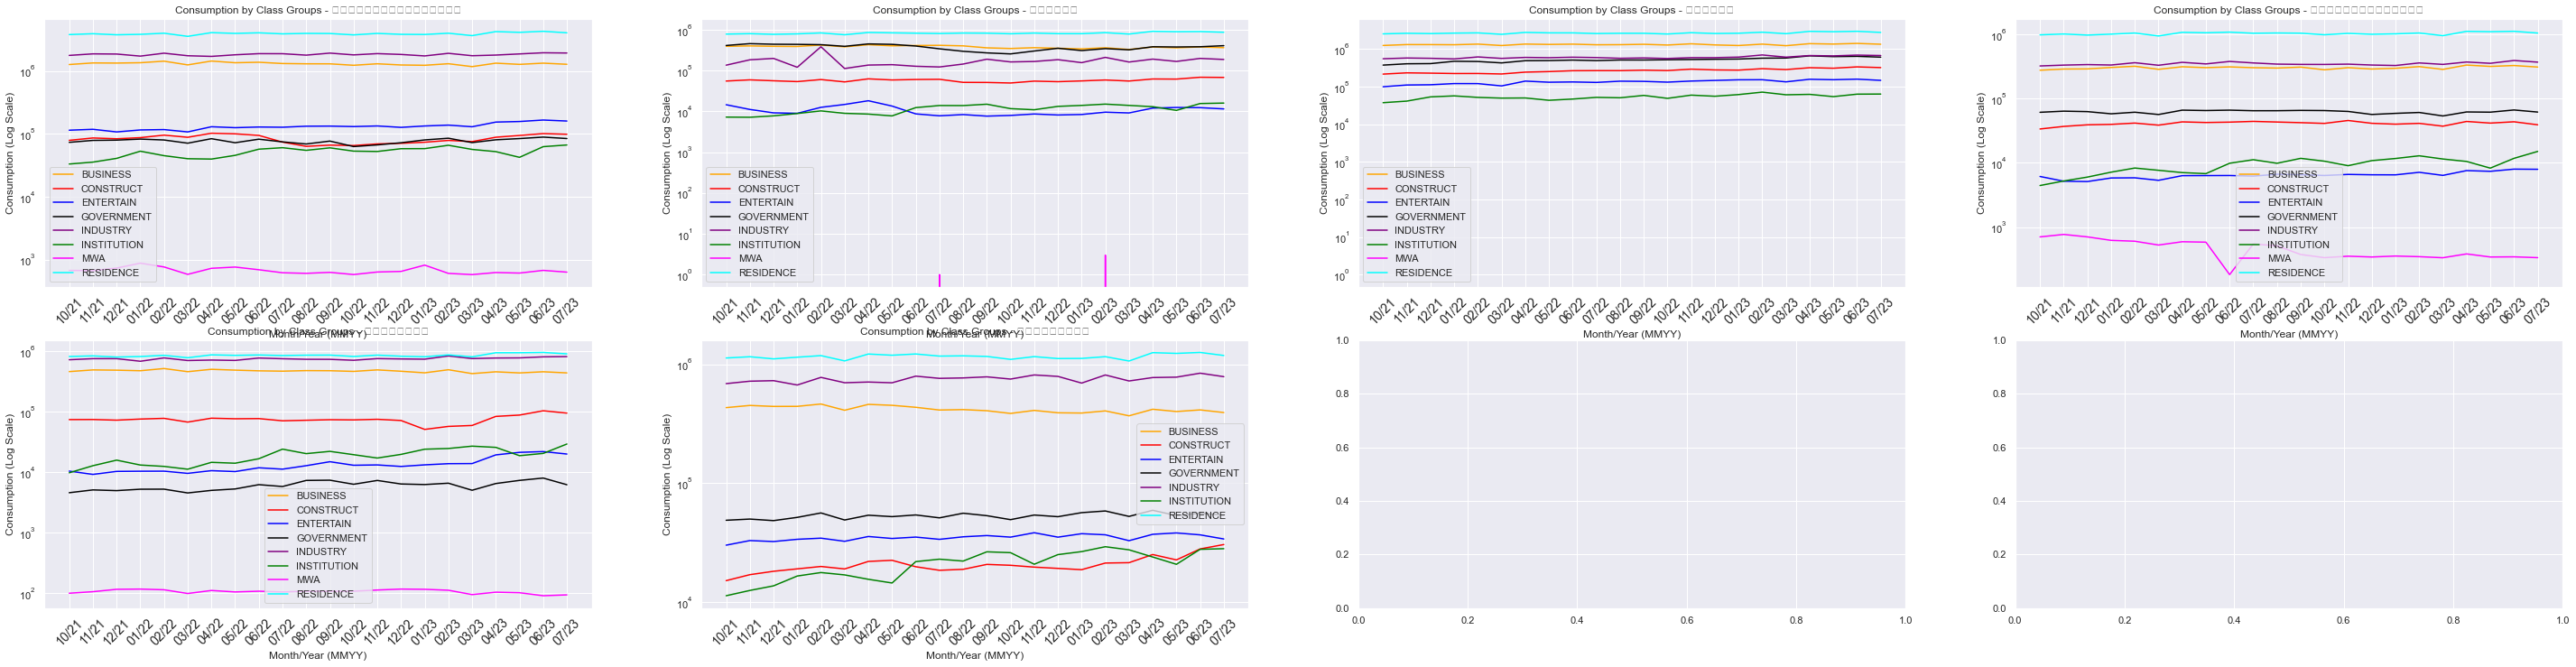

Province นนทบุรี
   1 : เมืองนนทบุรี
0 0
   2 : บางกรวย
0 1
   3 : บางใหญ่
0 2
   4 : ไทรน้อย
0 3
   5 : ปากเกร็ด
1 0
   6 : บางบัวทอง
1 1


/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) mis

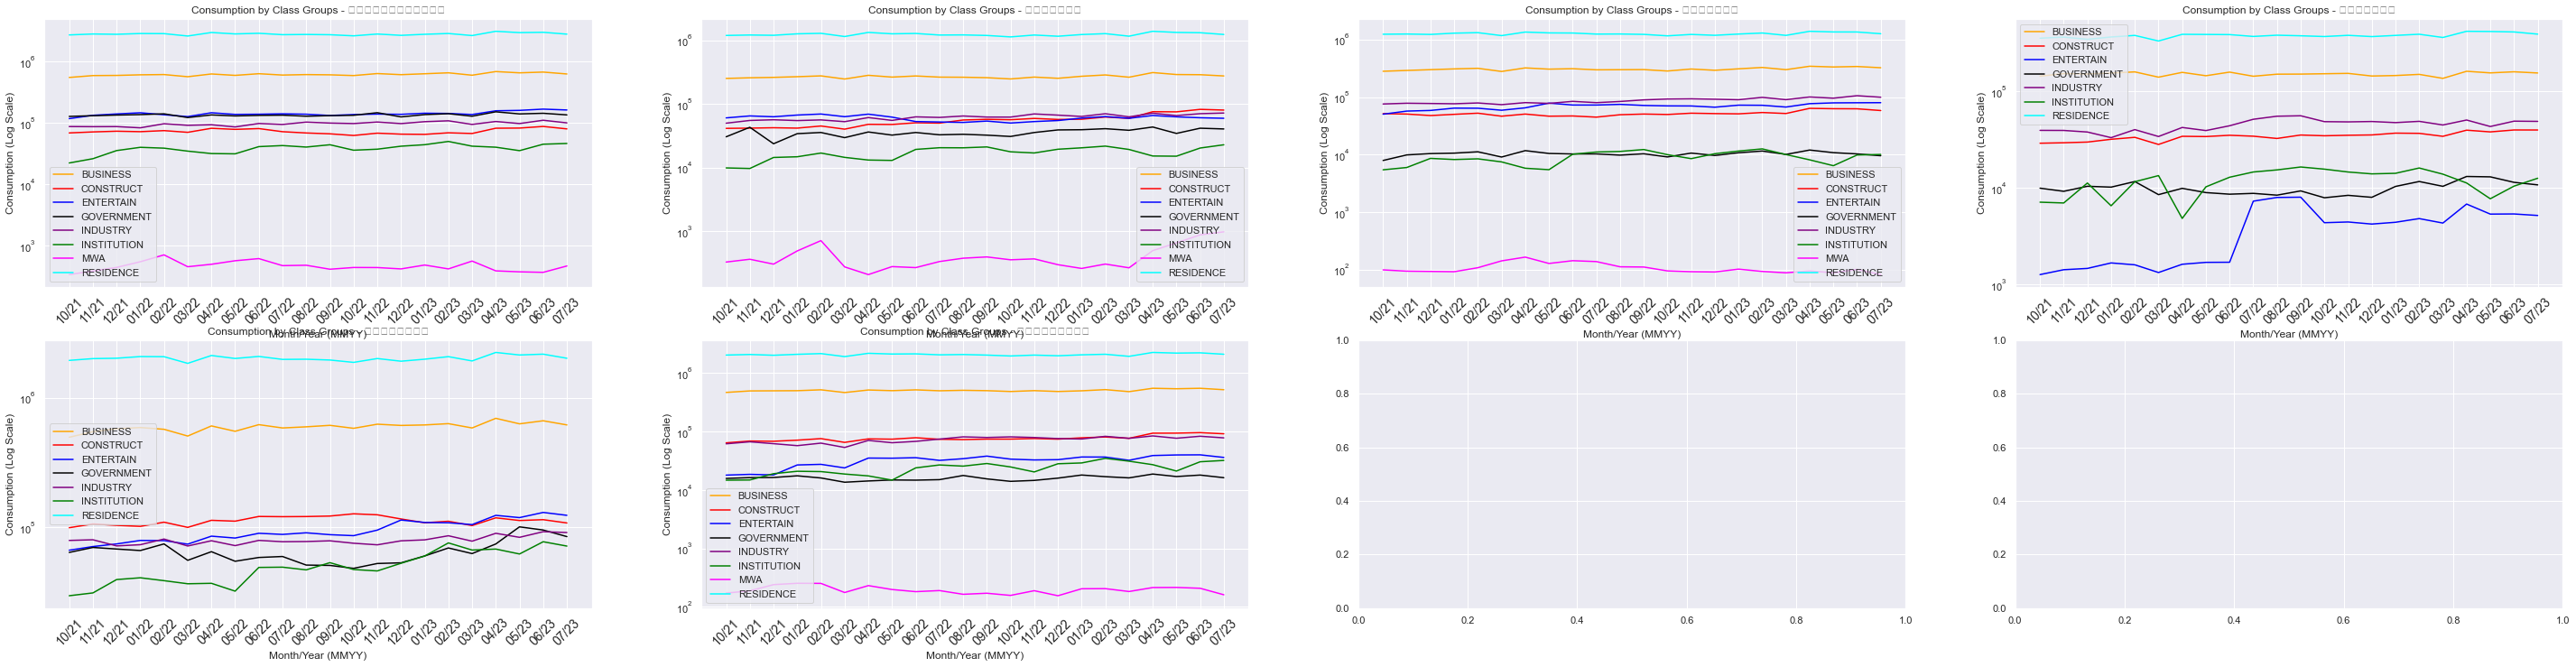

Province ปทุมธานี
   1 : ลำลูกกา
0 0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

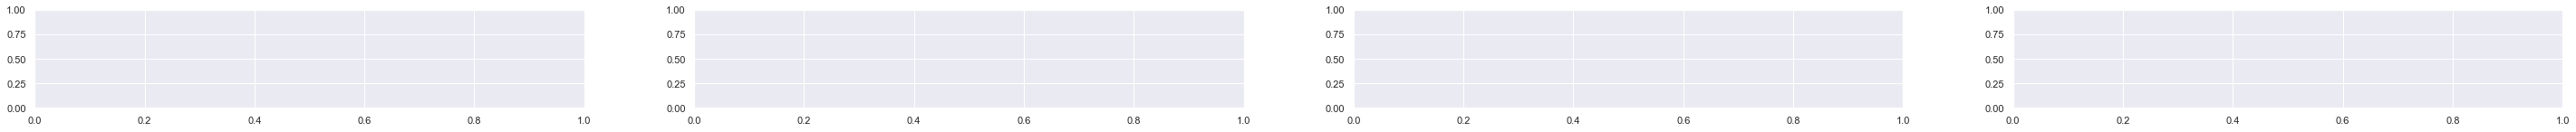

In [58]:
col_per_row = 4
class_group_colors = {
    'CONSTRUCT': 'red',
    'INSTITUTION': 'green',
    'ENTERTAIN': 'blue',
    'INDUSTRY': 'purple',
    'BUSINESS': 'orange',
    'RESIDENCE': 'cyan',
    'MWA': 'magenta',
    'GOVERNMENT': 'black',
}
sns.set(style="darkgrid")
for p,pv in enumerate(pv_name):
    print("Province",pv)
    row=0
    ap_names = cleaned_df[cleaned_df['province_name']==pv]['amphur_name'].unique()
    ap_num = ap_names.shape[0]
    rows = math.ceil(ap_names.shape[0]/col_per_row)
    fig, ax = plt.subplots(rows,col_per_row,figsize=(50, ap_num*2))
    for a,ap in enumerate(ap_names):
        print("  ",a+1,":",ap)
        if a >= col_per_row-1 and a%col_per_row == 0:
            row+=1
        print(row,a%col_per_row)

        for class_group_name, data in cleaned_df[(cleaned_df['province_name']==pv) & (cleaned_df['amphur_name']==ap)].groupby('class_group_name'):
            sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}', ax=ax[row, a % col_per_row],color=class_group_colors.get(class_group_name, 'gray'))

        # Set labels and legend for line chart
        ax[row, a % col_per_row].set_xlabel('Month/Year (MMYY)')
        ax[row, a % col_per_row].set_ylabel('Consumption (Log Scale)')
        ax[row, a % col_per_row].set_yscale('log')
        ax[row, a % col_per_row].set_title(f'Consumption by Class Groups - {ap}')
        ax[row, a % col_per_row].tick_params(axis='x', labelrotation=45,labelsize=14)

    plt.show()

/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) 

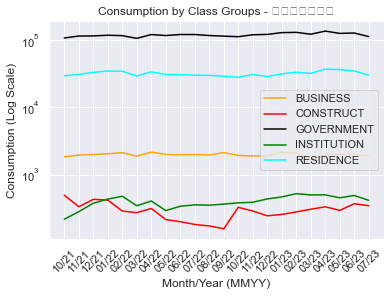

In [59]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='ปทุมธานี') & (cleaned_df['amphur_name']=='ลำลูกกา')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) 

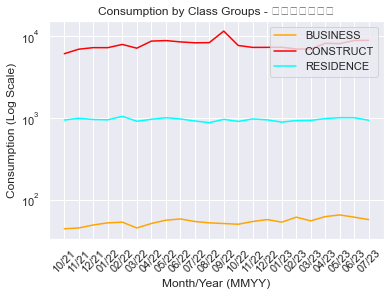

In [28]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='ฉะเชิงเทรา') & (cleaned_df['amphur_name']=='บางปะกง')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/siripatt/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) 

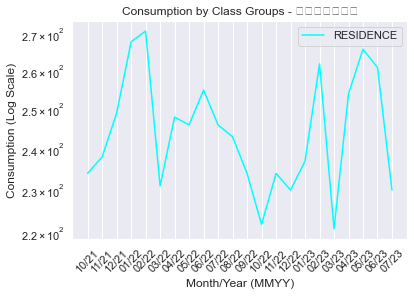

In [60]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='นครปฐม') & (cleaned_df['amphur_name']=='พุทธมณฑล')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

In [48]:
pv_names = cleaned_df['province_name'].unique()
dataset = {}
i=0
for p, pv in enumerate(pv_names):
    dataset[pv] = {}
    ap_names = cleaned_df[cleaned_df['province_name'] == pv]['amphur_name'].unique()
    for a, ap in enumerate(ap_names):
        dataset[pv][ap] = {}
        cs_names = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap)]['class_group_name'].unique()
        for c, cs in enumerate(cs_names):
            # sub_data = cleaned_df.loc[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            # dataset[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
            # dataset.rename(columns = {'consumption': 'x'}, inplace = True)
            # dataset['y'] = dataset['x'].copy().shift(-1)
            # dataset = dataset[:-1]
            # dataset
            sub_data = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            if sub_data.shape[0] != 0:
                i+=1
                dataset[pv][ap][cs] = sub_data[['YYMM','consumption']].copy().reset_index(drop=True)
                dataset[pv][ap][cs].rename(columns={'YYMM':'MMYY','consumption': 'x'}, inplace=True)
                dataset[pv][ap][cs]['y'] = dataset[pv][ap][cs]['x'].shift(-1)
                dataset[pv][ap][cs] = dataset[pv][ap][cs][:-1]
            print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')

1:::กรุงเทพมหานคร-พระนคร-ENTERTAIN--samples:22
2:::กรุงเทพมหานคร-พระนคร-GOVERNMENT--samples:22
3:::กรุงเทพมหานคร-พระนคร-INSTITUTION--samples:22
4:::กรุงเทพมหานคร-พระนคร-CONSTRUCT--samples:22
5:::กรุงเทพมหานคร-พระนคร-BUSINESS--samples:22
6:::กรุงเทพมหานคร-พระนคร-RESIDENCE--samples:22
7:::กรุงเทพมหานคร-พระนคร-INDUSTRY--samples:18
8:::กรุงเทพมหานคร-ดุสิต-BUSINESS--samples:22
9:::กรุงเทพมหานคร-ดุสิต-INDUSTRY--samples:22
10:::กรุงเทพมหานคร-ดุสิต-ENTERTAIN--samples:22
11:::กรุงเทพมหานคร-ดุสิต-GOVERNMENT--samples:22
12:::กรุงเทพมหานคร-ดุสิต-INSTITUTION--samples:22
13:::กรุงเทพมหานคร-ดุสิต-MWA--samples:22
14:::กรุงเทพมหานคร-ดุสิต-CONSTRUCT--samples:22
15:::กรุงเทพมหานคร-ดุสิต-RESIDENCE--samples:22
16:::กรุงเทพมหานคร-หนองจอก-BUSINESS--samples:22
17:::กรุงเทพมหานคร-หนองจอก-INDUSTRY--samples:22
18:::กรุงเทพมหานคร-หนองจอก-ENTERTAIN--samples:22
19:::กรุงเทพมหานคร-หนองจอก-GOVERNMENT--samples:22
20:::กรุงเทพมหานคร-หนองจอก-INSTITUTION--samples:22
21:::กรุงเทพมหานคร-หนองจอก-CONSTRUCT--samples:22
22:::ก

In [49]:
dataset['กรุงเทพมหานคร']['พระนคร']

{'ENTERTAIN':      MMYY      x        y
 0   10/21  33640  34443.0
 1   11/21  34443  36021.0
 2   12/21  36021  38717.0
 3   01/22  38717  37815.0
 4   02/22  37815  36878.0
 5   03/22  36878  42709.0
 6   04/22  42709  40410.0
 7   05/22  40410  40383.0
 8   06/22  40383  61408.0
 9   07/22  61408  74049.0
 10  08/22  74049  76512.0
 11  09/22  76512  71904.0
 12  10/22  71904  84248.0
 13  11/22  84248  82522.0
 14  12/22  82522  91233.0
 15  01/23  91233  93540.0
 16  02/23  93540  87298.0
 17  03/23  87298  95522.0
 18  04/23  95522  94092.0
 19  05/23  94092  91187.0
 20  06/23  91187  92406.0,
 'GOVERNMENT':      MMYY      x        y
 0   10/21  46032  44461.0
 1   11/21  44461  47007.0
 2   12/21  47007  47321.0
 3   01/22  47321  49274.0
 4   02/22  49274  41860.0
 5   03/22  41860  50095.0
 6   04/22  50095  49555.0
 7   05/22  49555  54866.0
 8   06/22  54866  47259.0
 9   07/22  47259  44045.0
 10  08/22  44045  47912.0
 11  09/22  47912  45856.0
 12  10/22  45856  60557.0


In [50]:
pv_names = cleaned_df['province_name'].unique()
dataset_lag = {}
lag_range = 3
i=0
for p, pv in enumerate(pv_names):
    dataset_lag[pv] = {}
    ap_names = cleaned_df[cleaned_df['province_name'] == pv]['amphur_name'].unique()
    for a, ap in enumerate(ap_names):
        dataset_lag[pv][ap] = {}
        cs_names = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap)]['class_group_name'].unique()
        for c, cs in enumerate(cs_names):
            # sub_data = cleaned_df.loc[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            # dataset[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
            # dataset.rename(columns = {'consumption': 'x'}, inplace = True)
            # dataset['y'] = dataset['x'].copy().shift(-1)
            # dataset = dataset[:-1]
            # dataset
            sub_data = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            if sub_data.shape[0] != 0:
                i+=1
                # LAG DATASET
                dataset_lag[pv][ap][cs] = sub_data[['YYMM','consumption']].copy().reset_index(drop=True)
                dataset_lag[pv][ap][cs].rename(columns={'YYMM':'MMYY','consumption': 'x'}, inplace=True)
                for l in range(lag_range):
                    dataset_lag[pv][ap][cs]['x'+str(l)] = dataset_lag[pv][ap][cs]['x'].copy().shift(-l)
                dataset_lag[pv][ap][cs]['y'] = dataset_lag[pv][ap][cs]['x'].copy().shift(-(lag_range))
                dataset_lag[pv][ap][cs] = dataset_lag[pv][ap][cs][:-lag_range]
                dataset_lag[pv][ap][cs] = dataset_lag[pv][ap][cs].drop(columns='x')
            print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')

1:::กรุงเทพมหานคร-พระนคร-ENTERTAIN--samples:22
2:::กรุงเทพมหานคร-พระนคร-GOVERNMENT--samples:22
3:::กรุงเทพมหานคร-พระนคร-INSTITUTION--samples:22
4:::กรุงเทพมหานคร-พระนคร-CONSTRUCT--samples:22
5:::กรุงเทพมหานคร-พระนคร-BUSINESS--samples:22
6:::กรุงเทพมหานคร-พระนคร-RESIDENCE--samples:22
7:::กรุงเทพมหานคร-พระนคร-INDUSTRY--samples:18
8:::กรุงเทพมหานคร-ดุสิต-BUSINESS--samples:22
9:::กรุงเทพมหานคร-ดุสิต-INDUSTRY--samples:22
10:::กรุงเทพมหานคร-ดุสิต-ENTERTAIN--samples:22
11:::กรุงเทพมหานคร-ดุสิต-GOVERNMENT--samples:22
12:::กรุงเทพมหานคร-ดุสิต-INSTITUTION--samples:22
13:::กรุงเทพมหานคร-ดุสิต-MWA--samples:22
14:::กรุงเทพมหานคร-ดุสิต-CONSTRUCT--samples:22
15:::กรุงเทพมหานคร-ดุสิต-RESIDENCE--samples:22
16:::กรุงเทพมหานคร-หนองจอก-BUSINESS--samples:22
17:::กรุงเทพมหานคร-หนองจอก-INDUSTRY--samples:22
18:::กรุงเทพมหานคร-หนองจอก-ENTERTAIN--samples:22
19:::กรุงเทพมหานคร-หนองจอก-GOVERNMENT--samples:22
20:::กรุงเทพมหานคร-หนองจอก-INSTITUTION--samples:22
21:::กรุงเทพมหานคร-หนองจอก-CONSTRUCT--samples:22
22:::ก

In [51]:
dataset['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']

MMYY       x         y
0   10/21  164415  169733.0
1   11/21  169733  167071.0
2   12/21  167071  168906.0
3   01/22  168906  172480.0
4   02/22  172480  155949.0
5   03/22  155949  173775.0
6   04/22  173775  170614.0
7   05/22  170614  176461.0
8   06/22  176461  168600.0
9   07/22  168600  168277.0
10  08/22  168277  170881.0
11  09/22  170881  163303.0
12  10/22  163303  169114.0
13  11/22  169114  166455.0
14  12/22  166455  169580.0
15  01/23  169580  173883.0
16  02/23  173883  158743.0
17  03/23  158743  182400.0
18  04/23  182400  175517.0
19  05/23  175517  181398.0
20  06/23  181398  174328.0

In [52]:
dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']

MMYY      x0        x1        x2         y
0   10/21  164415  169733.0  167071.0  168906.0
1   11/21  169733  167071.0  168906.0  172480.0
2   12/21  167071  168906.0  172480.0  155949.0
3   01/22  168906  172480.0  155949.0  173775.0
4   02/22  172480  155949.0  173775.0  170614.0
5   03/22  155949  173775.0  170614.0  176461.0
6   04/22  173775  170614.0  176461.0  168600.0
7   05/22  170614  176461.0  168600.0  168277.0
8   06/22  176461  168600.0  168277.0  170881.0
9   07/22  168600  168277.0  170881.0  163303.0
10  08/22  168277  170881.0  163303.0  169114.0
11  09/22  170881  163303.0  169114.0  166455.0
12  10/22  163303  169114.0  166455.0  169580.0
13  11/22  169114  166455.0  169580.0  173883.0
14  12/22  166455  169580.0  173883.0  158743.0
15  01/23  169580  173883.0  158743.0  182400.0
16  02/23  173883  158743.0  182400.0  175517.0
17  03/23  158743  182400.0  175517.0  181398.0
18  04/23  182400  175517.0  181398.0  174328.0

<h2>Linear regression with Normalization</h2>

In [61]:
def mean_absolute_percent_error(y_true, y_pred):
    # Ensure that y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the absolute percent error for each data point
    absolute_percent_error = np.abs((y_true - y_pred) / y_true)
    
    # Calculate the mean of the absolute percent errors and multiply by 100 to get the percentage
    mape = np.mean(absolute_percent_error) * 100
    
    return mape

coefficient of determination: 0.08127940343187134
intercept: [1.38777878e-17]
slope: [[-0.28509543]]
Mean Squared Error: 78762294.42716284
Mean Absolute Percent Error: 4.609406784262521
R-squared: 0.01802153442918586


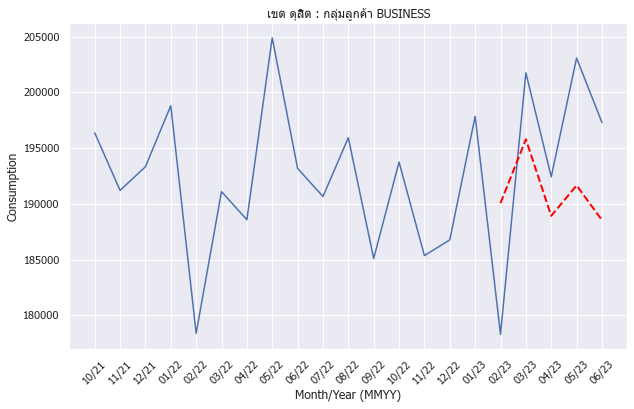

coefficient of determination: 0.7609167800594461
intercept: [-6.9388939e-18]
slope: [[0.87230544]]
Mean Squared Error: 151291.2304752834
Mean Absolute Percent Error: 5.626151908314766
R-squared: -2.065017602593553


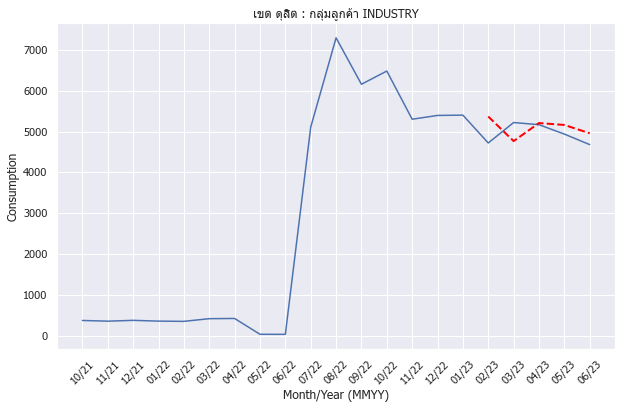

coefficient of determination: 0.7185466102242266
intercept: [2.77555756e-17]
slope: [[0.84767129]]
Mean Squared Error: 931910.0783650862
Mean Absolute Percent Error: 4.612355373114546
R-squared: -1.2778439973241214


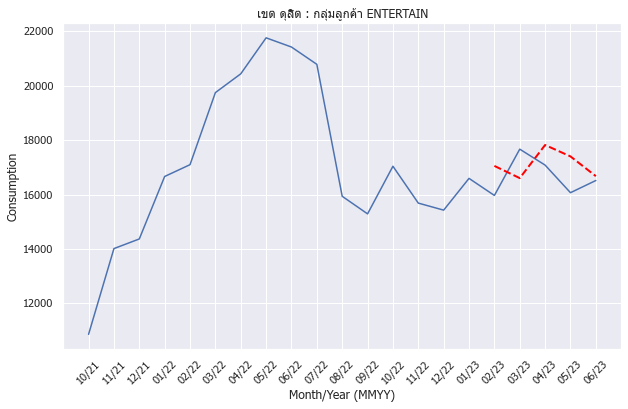

coefficient of determination: 0.08274304546425404
intercept: [-9.9798957e-19]
slope: [[0.28765091]]
Mean Squared Error: 978343821.8458216
Mean Absolute Percent Error: 9.007641627269637
R-squared: -1.443458340248167


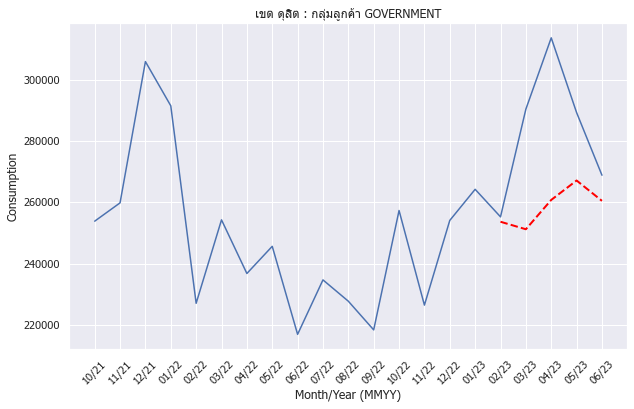

coefficient of determination: 0.7194896880710666
intercept: [2.77555756e-17]
slope: [[0.84822738]]
Mean Squared Error: 100466976.14803739
Mean Absolute Percent Error: 15.134582370394325
R-squared: -1.2197088805838754


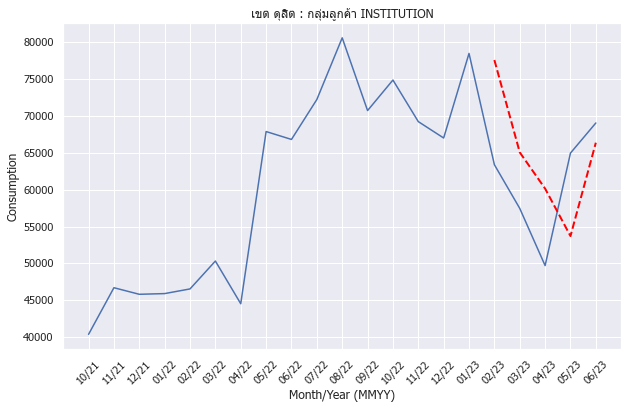

coefficient of determination: 0.06036386657810178
intercept: [0.]
slope: [[0.24569059]]
Mean Squared Error: 842772.8824542554
Mean Absolute Percent Error: 40.17799622092433
R-squared: -0.6395611889882988


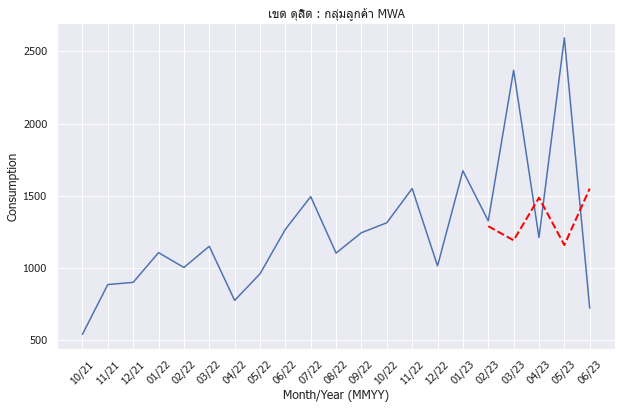

coefficient of determination: 0.6327749470758108
intercept: [2.77555756e-17]
slope: [[0.79547152]]
Mean Squared Error: 75742605.41961412
Mean Absolute Percent Error: 36.653497959250444
R-squared: -1.7431467822958608


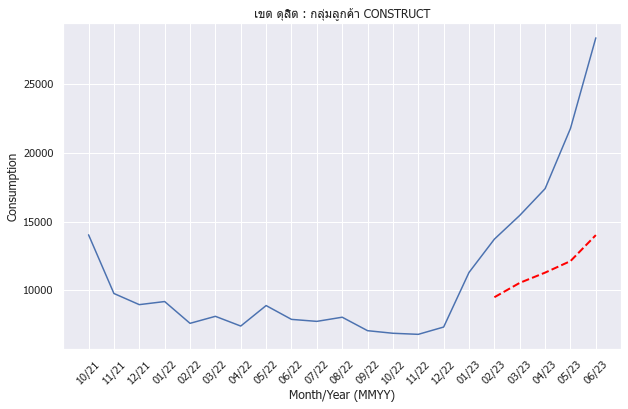

coefficient of determination: 0.002043973456314019
intercept: [0.]
slope: [[-0.04521032]]
Mean Squared Error: 450275982.412434
Mean Absolute Percent Error: 5.185488585468659
R-squared: -0.06152277930805483


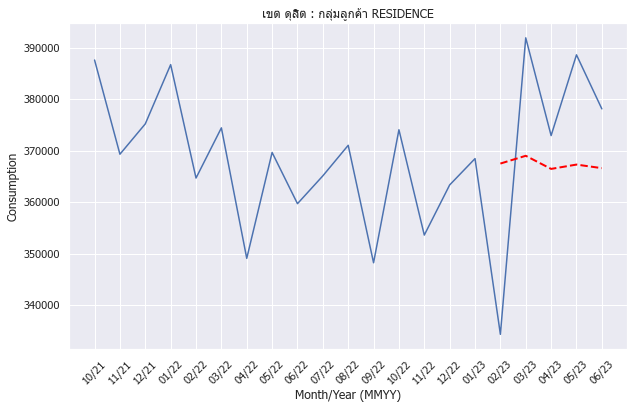

coefficient of determination: 0.17294670284889802
intercept: [-1.27102303e-17]
slope: [[-0.41586861]]
Mean Squared Error: 90708415.13690707
Mean Absolute Percent Error: 4.955521345140134
R-squared: -0.2703589016661294


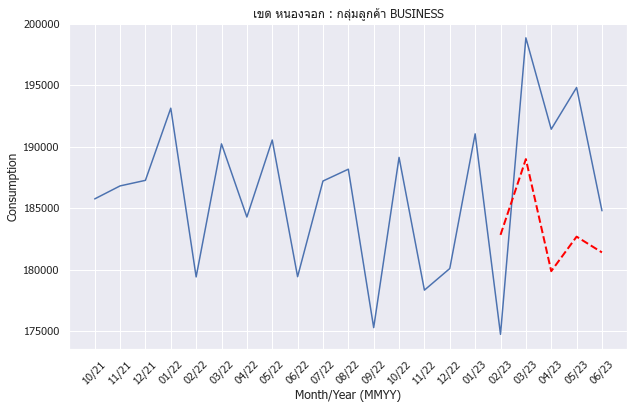

coefficient of determination: 0.08820148036238451
intercept: [2.77555756e-17]
slope: [[0.29698734]]
Mean Squared Error: 59853776.22920139
Mean Absolute Percent Error: 4.414420018799202
R-squared: -1.4994148201022517


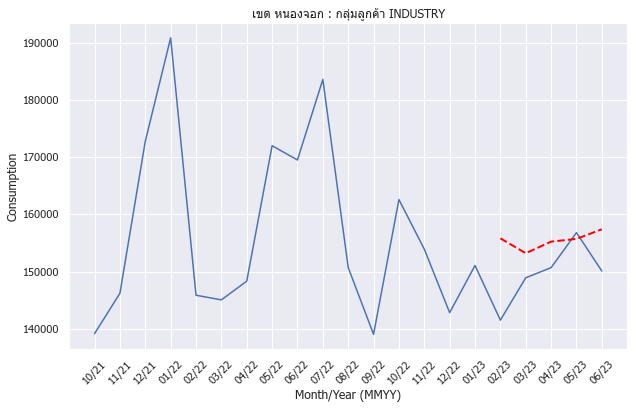

coefficient of determination: 0.8771724143993467
intercept: [5.37507492e-17]
slope: [[0.93657483]]
Mean Squared Error: 1261998.0605217689
Mean Absolute Percent Error: 16.177553718874606
R-squared: 0.1247999585605537


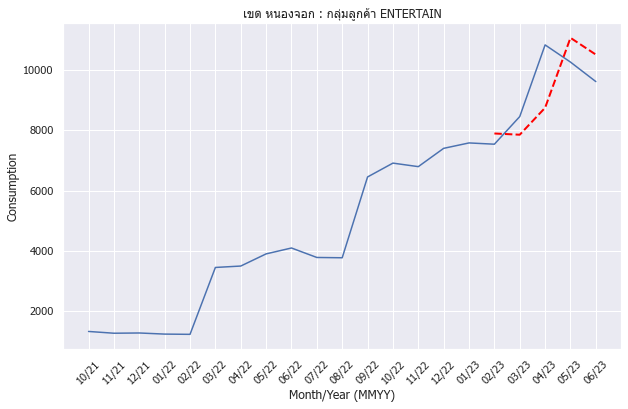

coefficient of determination: 0.553926211534741
intercept: [-2.06574256e-17]
slope: [[0.74426219]]
Mean Squared Error: 263140058.4644513
Mean Absolute Percent Error: 3.6724986553465038
R-squared: -2.5486274061724985


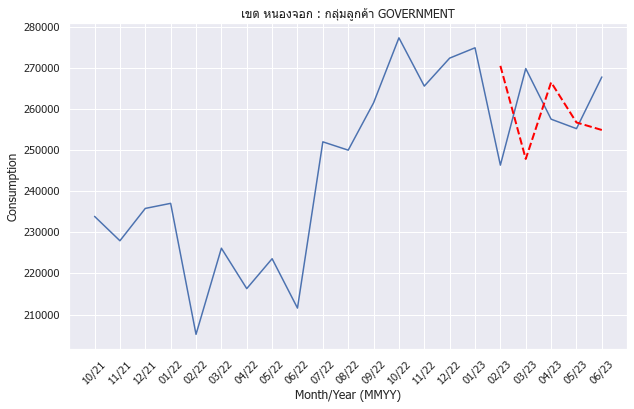

coefficient of determination: 0.4655893848339254
intercept: [-1.6408279e-17]
slope: [[0.68234111]]
Mean Squared Error: 34461752.347335495
Mean Absolute Percent Error: 21.89664327004344
R-squared: -0.2470701510572686


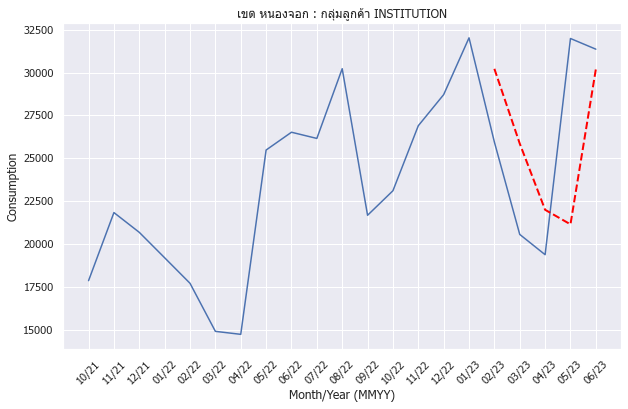

coefficient of determination: 0.1968587243422918
intercept: [1.23148059e-17]
slope: [[0.44368764]]
Mean Squared Error: 35507613.070284
Mean Absolute Percent Error: 9.960004715866493
R-squared: -2.959513547326833


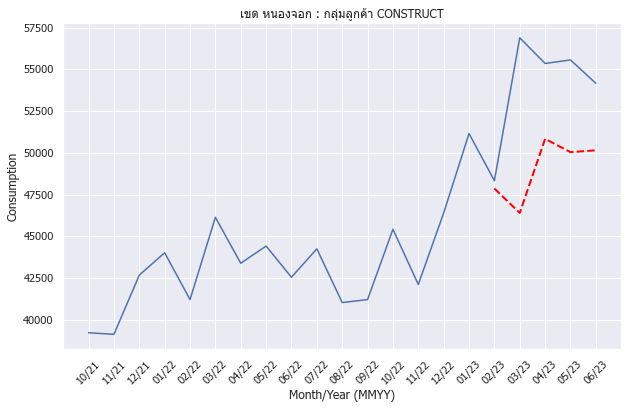

coefficient of determination: 0.09629024208850934
intercept: [2.77555756e-17]
slope: [[-0.31030669]]
Mean Squared Error: 15125018636.98273
Mean Absolute Percent Error: 8.505532568273786
R-squared: -1.626336770414539


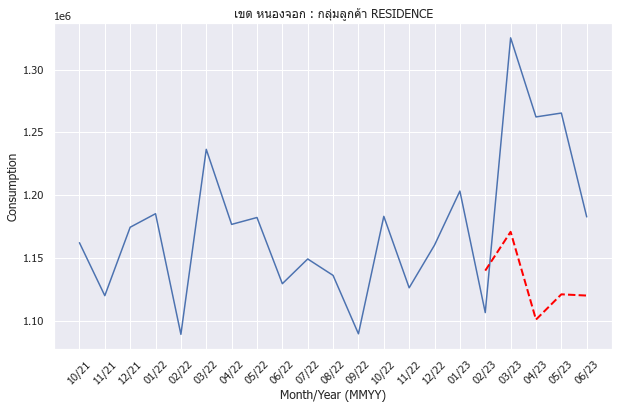

coefficient of determination: 0.01899015070279253
intercept: [-2.39307253e-17]
slope: [[-0.13780476]]
Mean Squared Error: 53.3051656727074
Mean Absolute Percent Error: 7.052510089908965
R-squared: -13.176905764017928


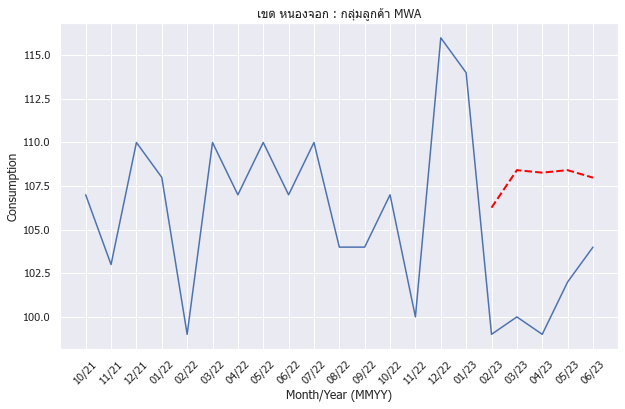

coefficient of determination: 0.17553976130565652
intercept: [-2.2489051e-18]
slope: [[-0.41897465]]
Mean Squared Error: 1526447569.5781732
Mean Absolute Percent Error: 8.069097758568512
R-squared: -1.7298250459457787


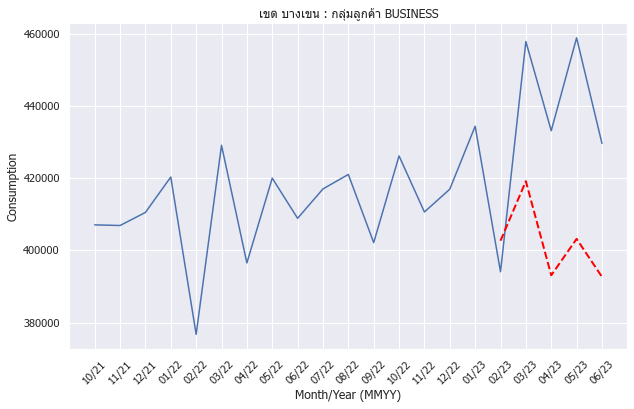

coefficient of determination: 0.004094136300906492
intercept: [2.77555756e-17]
slope: [[0.06398544]]
Mean Squared Error: 3374031.47606461
Mean Absolute Percent Error: 7.058603859632099
R-squared: -0.7579963892865729


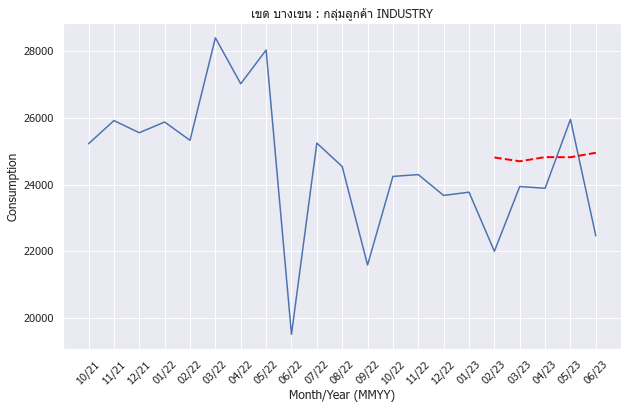

coefficient of determination: 0.009491022380350822
intercept: [-1.81126814e-17]
slope: [[-0.09742188]]
Mean Squared Error: 175871586.95611352
Mean Absolute Percent Error: 22.20639413666564
R-squared: -6.4351291975152565


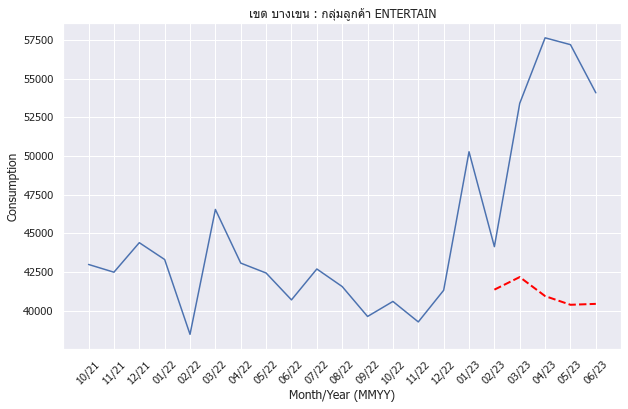

coefficient of determination: 0.5652154106966748
intercept: [4.8622442e-17]
slope: [[0.75180809]]
Mean Squared Error: 17649838.12315575
Mean Absolute Percent Error: 8.197771527449527
R-squared: -1.2469785643708344


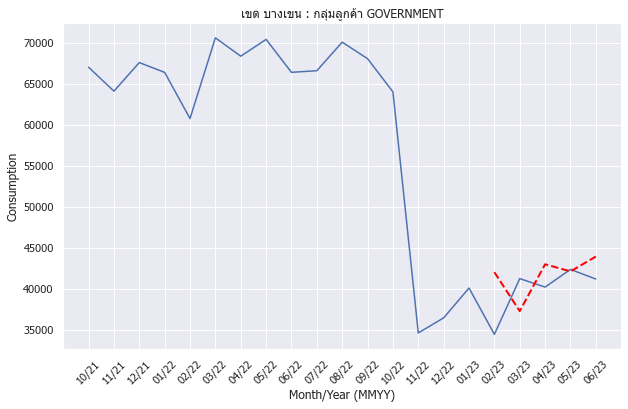

coefficient of determination: 0.19200312476410852
intercept: [-2.43239657e-17]
slope: [[0.43818161]]
Mean Squared Error: 47220329.233145535
Mean Absolute Percent Error: 9.174014368368791
R-squared: -1.9987304036268525


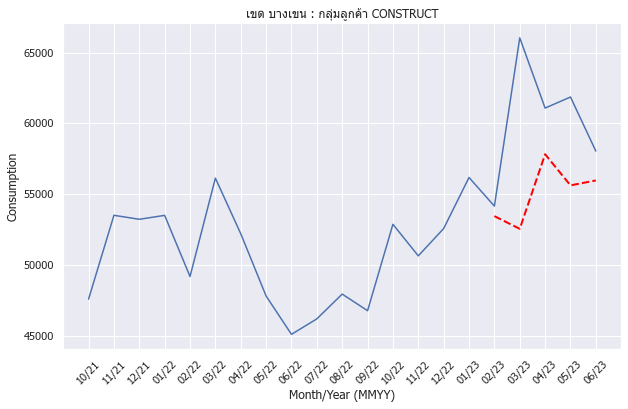

coefficient of determination: 0.22681375650236846
intercept: [-1.3218584e-17]
slope: [[0.47624968]]
Mean Squared Error: 1773.4271004197756
Mean Absolute Percent Error: 8.095388881848137
R-squared: -0.9725786399045373


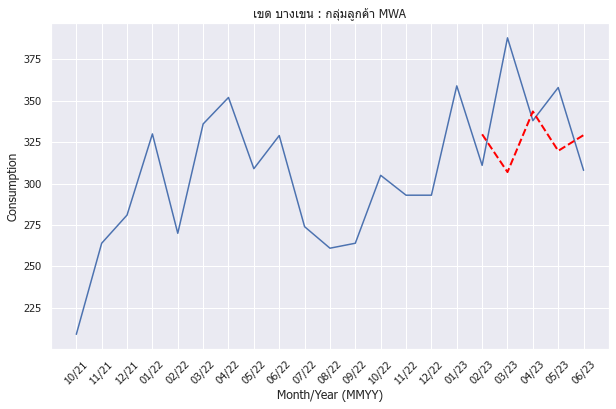

coefficient of determination: 0.18110610774583402
intercept: [-4.72417782e-18]
slope: [[-0.42556563]]
Mean Squared Error: 24636335323.36233
Mean Absolute Percent Error: 9.29693807008272
R-squared: -2.272424060899093


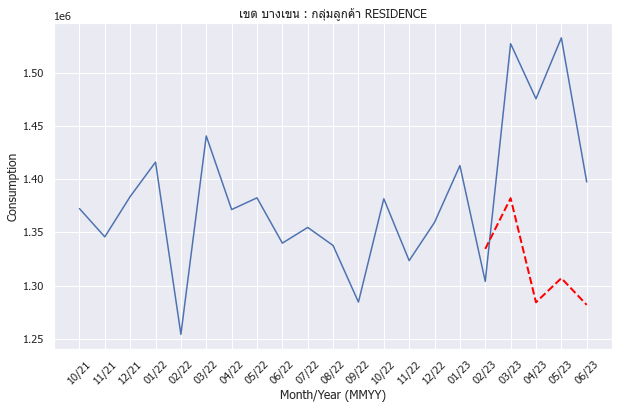

coefficient of determination: 0.23469747423609477
intercept: [0.]
slope: [[0.48445585]]
Mean Squared Error: 4179365.110575287
Mean Absolute Percent Error: 5.223908467079991
R-squared: -0.7751037763430111


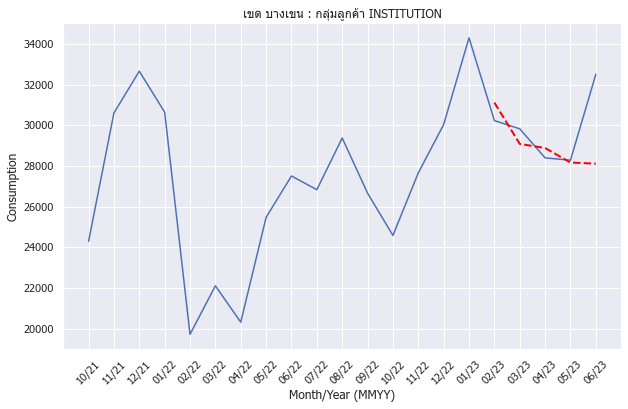

-----ALL MAPE 11.456830095039491


In [163]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

pv_sample =['กรุงเทพมหานคร']
ap_sample = ['ดุสิต','หนองจอก','บางเขน']

# Extract the features (x0, x1, x2) and target variable (y)
all_mape = []
for p,pv in enumerate(pv_sample):
    for a,ap in enumerate(ap_sample):
        cs_names = dataset[pv][ap].keys()
        for c, cs in enumerate(cs_names):

            X = dataset[pv][ap][cs][['x']]
            y = dataset[pv][ap][cs]['y']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)
            
            # Create a StandardScaler for both X and y
            X_scaler = StandardScaler()
            y_scaler = StandardScaler()

            # Fit the scalers on the training data and transform it
            X_train_scaled = X_scaler.fit_transform(X_train)
            y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

            # Transform the testing data using the fitted scalers
            X_test_scaled = X_scaler.transform(X_test)
            y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

            # Create a linear regression model
            model = LinearRegression()

            # Train the model on the scaled training data
            model.fit(X_train_scaled, y_train_scaled)

            r_sq = model.score(X_train_scaled, y_train_scaled)
            print('coefficient of determination:', r_sq)

            # Print the Intercept:
            print('intercept:', model.intercept_)

            # Print the Slope:
            print('slope:', model.coef_) 

            # Make predictions on the scaled testing data
            y_pred_scaled = model.predict(X_test_scaled)

            # Inverse transform the scaled predictions to the original scale
            y_pred = y_scaler.inverse_transform(y_pred_scaled)  

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mape = mean_absolute_percent_error(y_test, y_pred)
            all_mape.append(mape)
            r2 = r2_score(y_test, y_pred)

            print(f"Mean Squared Error: {mse}")
            print(f"Mean Absolute Percent Error: {mape}")
            print(f"R-squared: {r2}")

            plt.figure(figsize=(10, 6))
            plt.plot(pd.to_datetime(dataset[pv][ap][cs]['MMYY'], format='%m/%y').dt.strftime('%m/%y'), y)
            plt.plot(pd.to_datetime(dataset[pv][ap][cs]['MMYY'][y_test.index[0]:], format='%m/%y').dt.strftime('%m/%y'),y_pred, linestyle='--', color='red', linewidth=2)
            plt.tick_params(axis='x', labelrotation=45)
            plt.xlabel('Month/Year (MMYY)')
            plt.ylabel('Consumption')
            plt.title(f'เขต {ap} : กลุ่มลูกค้า {cs}')
            plt.show()
print("-----ALL MAPE",sum(all_mape)/len(all_mape))

<h2>Auto ML using h2o</h2>

In [186]:
import h2o
from h2o.automl import H2OAutoML
np.random.seed(3)

# Start the H2O cluster (locally)
def auto_ml(df_train, df_test, df_sample,ap,cs):
    h2o.init()
    # Import a sample binary outcome train/test set into H2O
    train = h2o.H2OFrame(df_train[['x0','x1','x2','y']])
    test = h2o.H2OFrame(df_test[['x0','x1','x2','y']])

    # Identify predictors and response
    x = train.columns
    y = "y"
    x.remove(y)

    # Run AutoML for 20 base models
    # aml = H2OAutoML(max_models=20, seed=30, max_runtime_secs = 120,include_algos = ["GLM", "DRF", "GBM","StackedEnsemble"])
    aml = H2OAutoML(max_models=10, seed=30, max_runtime_secs = 120)
    aml.train(x=x, y=y, training_frame=train, leaderboard_frame = test)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)
    
    leader_model = aml.leader
    test_predict = leader_model.predict(test)
    df_results = pd.DataFrame()
    print("df_test",df_test)
    df_results['ground_truth'] = df_test['y'].reset_index(drop=True)
    df_results['predictions'] = h2o.as_list(test_predict,use_pandas=True)
    print(df_results.head())

    plt.figure(figsize=(10, 6))
    # plt.plot(df_sample.index,df_sample['y'])
    plt.plot(df_sample['MMYY'],df_sample['y'])
    # plt.plot(df_test.index,df_results['predictions'])
    plt.plot(df_test['MMYY'],df_results['predictions'])
    plt.legend(['train','test'])
    plt.tick_params(axis='x', labelrotation=45)
    plt.xlabel('Month/Year (MMYY)')
    plt.ylabel('Consumption')
    plt.title(f'เขต {ap} : กลุ่มลูกค้า {cs}')
    plt.show()

    # def mape(a, b):
    #     mask = a != 0
    #     return (abs(a-b)/a)[mask].mean()
    # mape_score = mape(df_results['ground_truth'],df_results['predictions'])*100
    # print("MAPE:",mape_score)

    mape_score = mean_absolute_percent_error(df_results['ground_truth'],df_results['predictions'])
    print(mape_score)
    
    return(mape_score)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.775 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:25.70: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:17:25.185: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:25.186: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:25.186: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse       mse       mae    rmsle    mean_residual

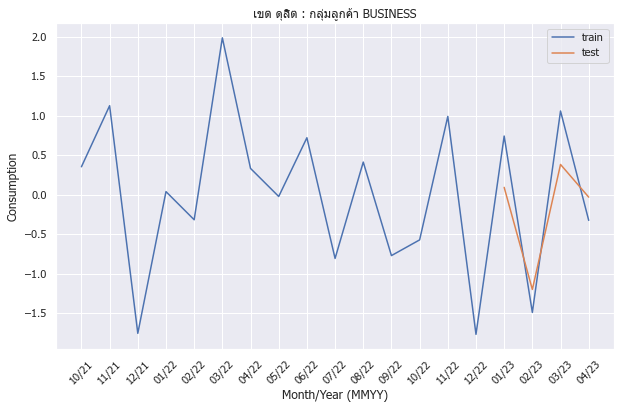

65.450383228075
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.775 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:29.13: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:29.207: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:29.207: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:29.208: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse               mse       mae      rmsle    m

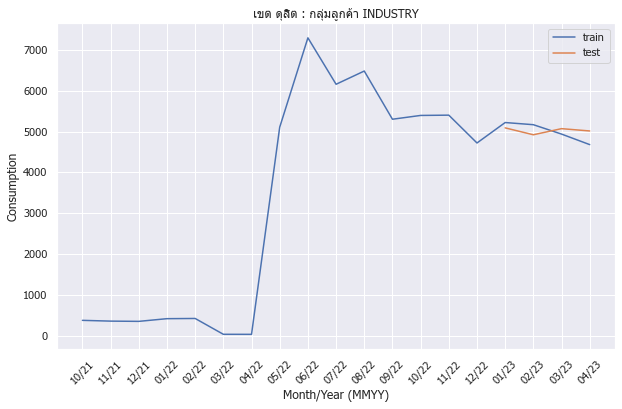

4.279597563952921
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.775 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:33.981: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:17:34.157: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:34.158: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:34.158: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse               mse        mae      rmsle    m

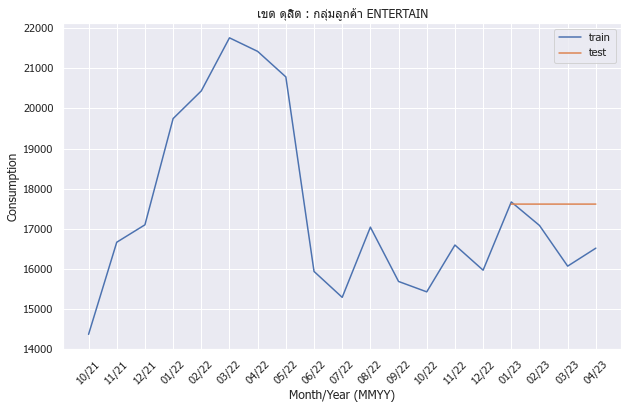

4.923589549988317
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.774 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:38.594: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:38.722: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:38.723: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:38.723: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

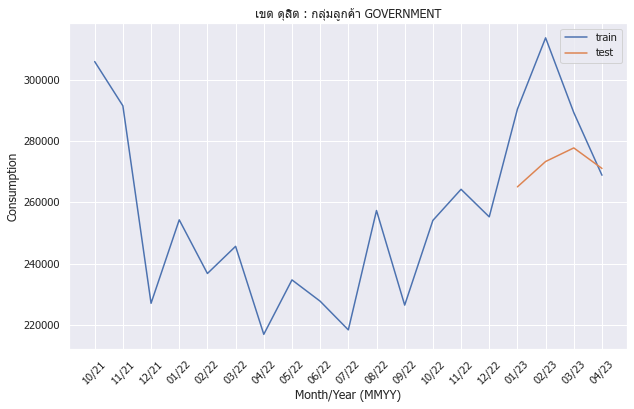

6.597091243628067
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.768 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:42.482: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:42.619: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:42.620: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:42.620: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

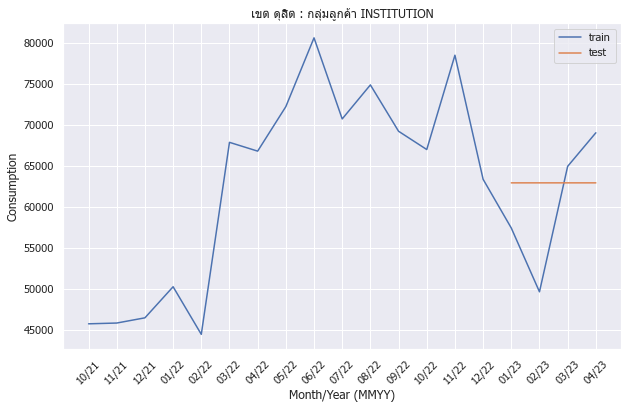

12.037163409936277
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 7 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.761 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:46.370: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:46.471: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:46.471: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:46.472: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse              mse       mae     rmsle    me

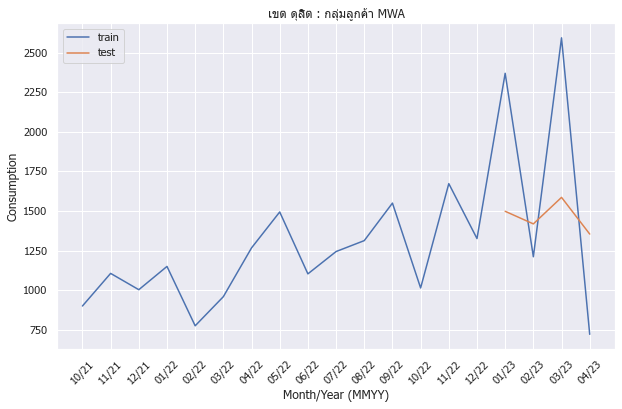

45.161036707466586
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.755 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:50.268: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:17:50.355: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:50.356: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:50.356: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse          mse       mae     rmsle    mean_resi

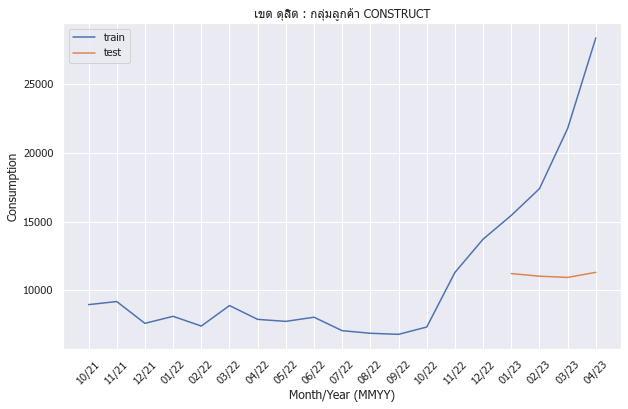

43.462838957160045
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.759 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:54.144: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:54.291: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:54.291: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:54.291: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae        rmsle    m

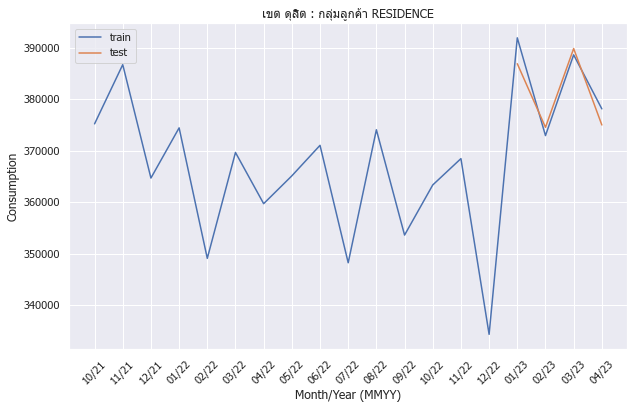

0.7136271697851445
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.758 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:17:58.78: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:17:58.226: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:58.226: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:17:58.226: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    mea

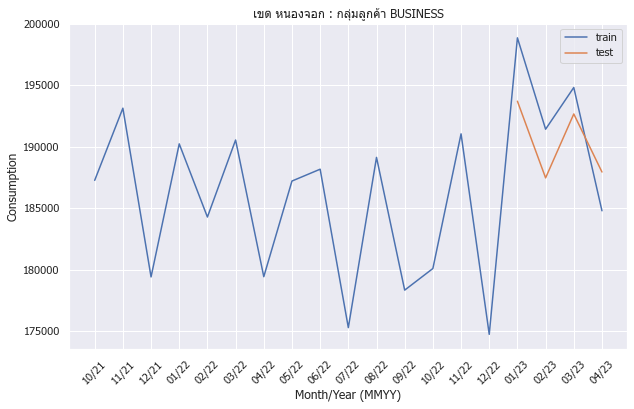

1.8659701515367455
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.756 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:02.832: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:02.991: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:02.995: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:02.995: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    me

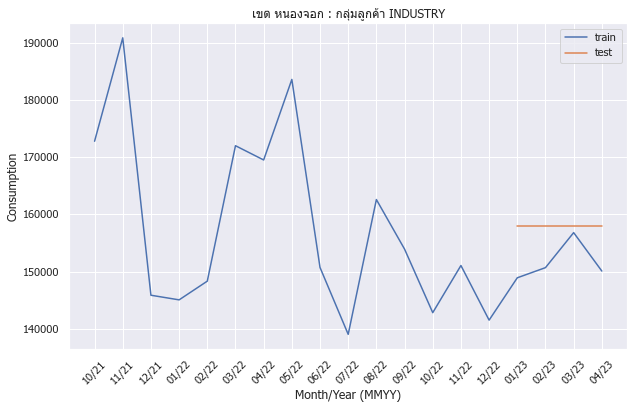

4.238520812276675
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.750 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:07.982: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:08.372: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:08.372: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:08.373: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse          mse       mae     rmsle    mean_re

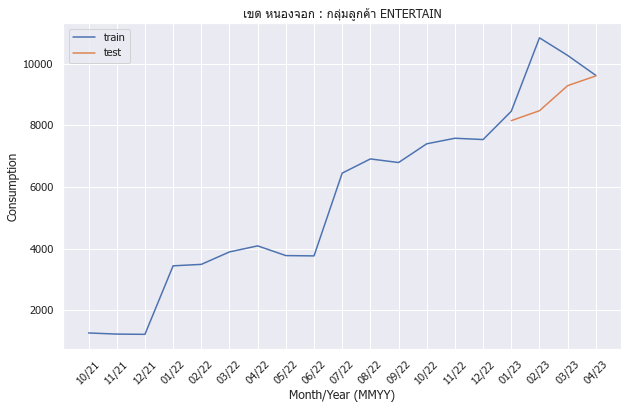

8.786197119010144
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.748 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:13.949: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:14.309: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:14.309: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:14.310: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    me

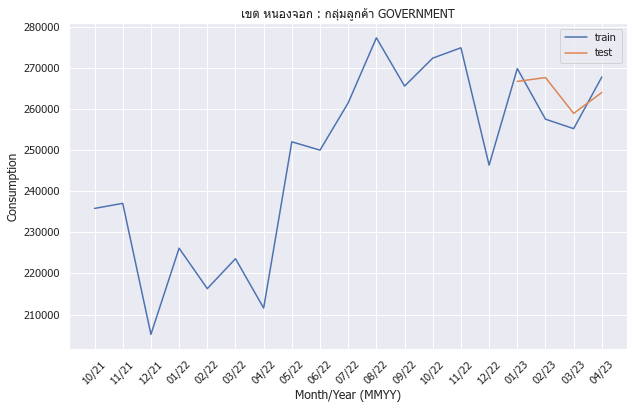

1.9868212403654635
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.742 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:19.482: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:19.627: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:19.628: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:19.628: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae     rmsle    mean_r

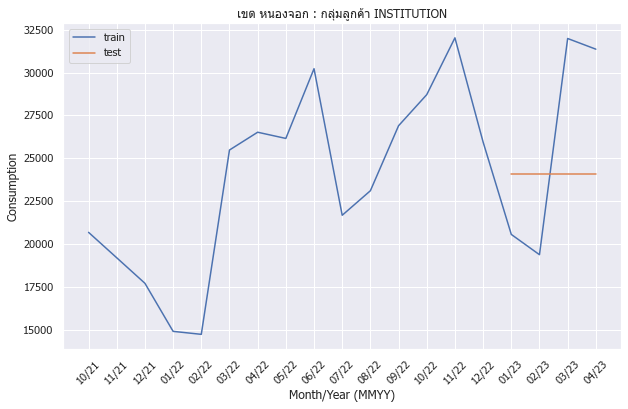

22.36808689242257
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.739 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:24.236: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:24.377: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:24.377: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:24.377: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

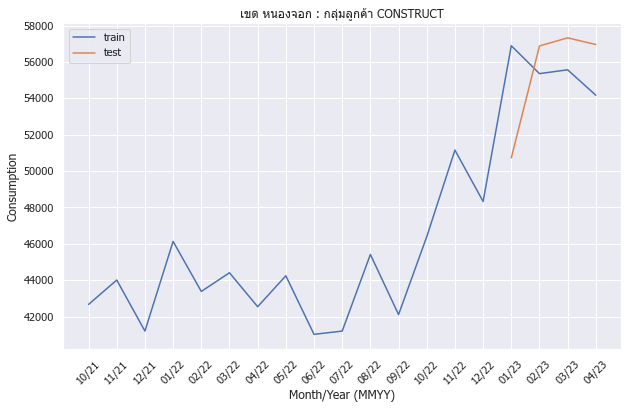

5.474949474400258
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.738 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:28.931: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:29.62: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:29.64: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:29.64: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                              rmse          mse               mae       

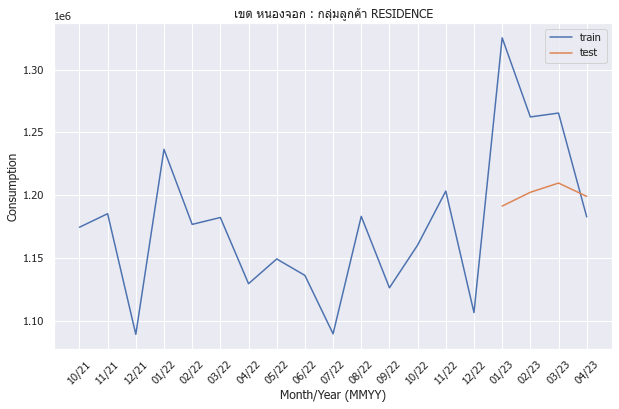

5.156494760985575
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.731 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:33.943: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:34.61: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:34.61: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:34.62: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse         mse        mae      rmsle    mean_re

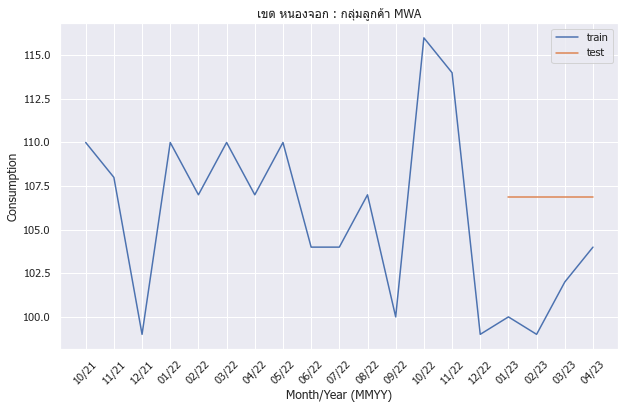

5.608081672694959
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.730 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:37.909: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:38.123: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:38.123: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:38.123: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

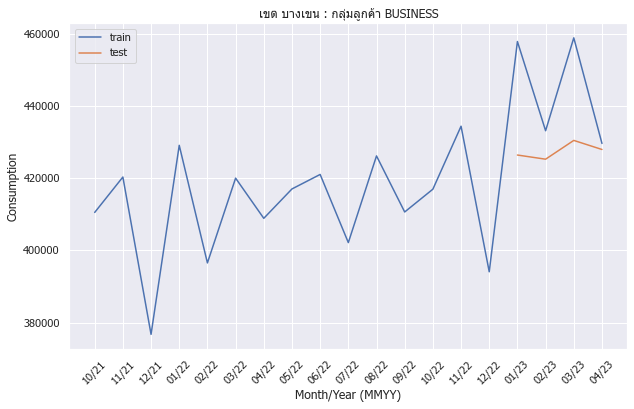

3.815029509618279
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.725 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:42.543: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:42.742: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:42.742: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:42.743: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse        mae      rmsle    mean

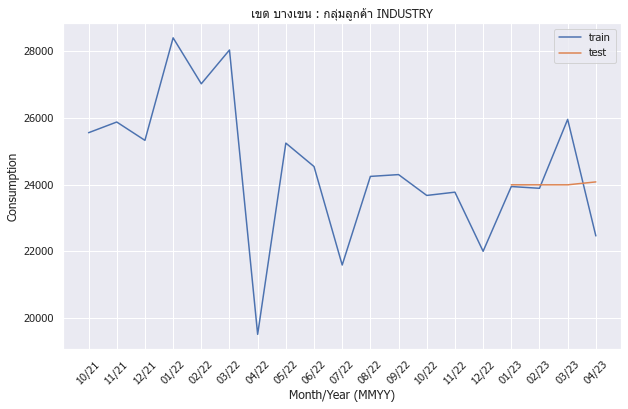

3.8559786486994194
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 8 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.722 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:47.471: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:47.627: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:47.628: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:47.628: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse          mse      mae      rmsle    mean_re

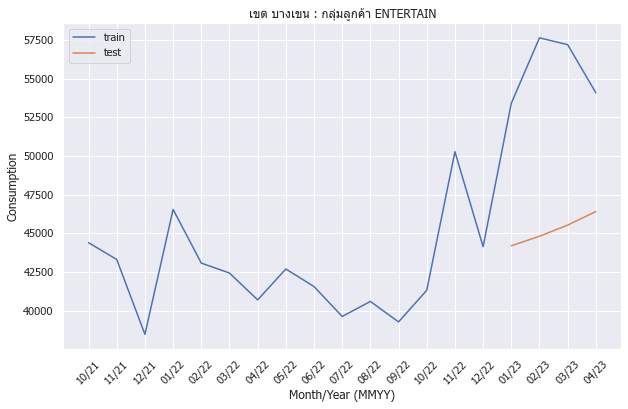

18.50378554315636
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 9 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.721 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:51.439: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:51.633: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:51.633: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:51.634: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

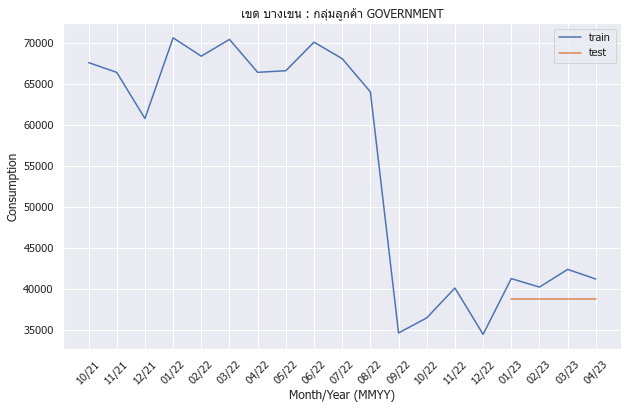

5.980924784247355
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 9 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.718 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:18:56.97: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:18:56.258: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:56.259: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:18:56.259: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_r

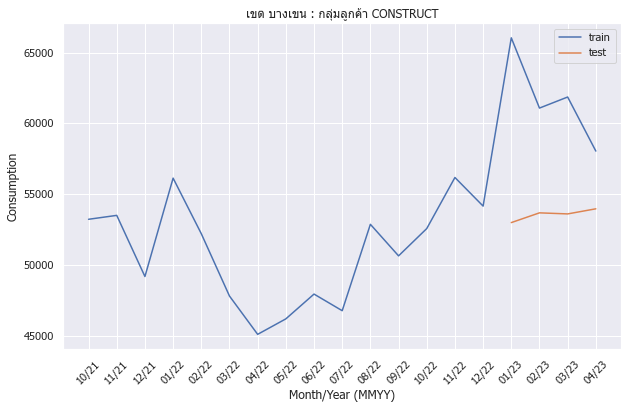

13.054925380288473
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 9 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.718 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:19:00.234: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:19:00.358: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:00.358: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:00.358: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse        mse       mae     rmsle    mean_resid

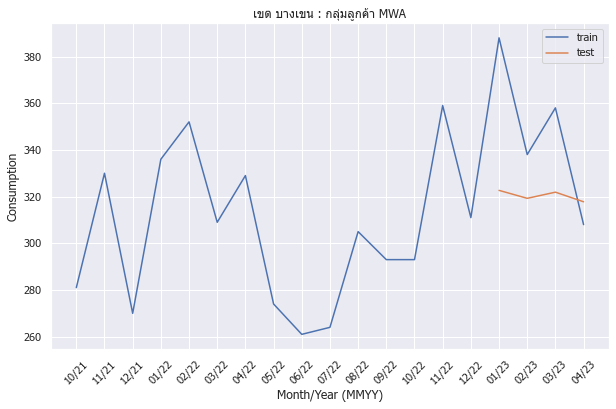

8.910726845038734
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 9 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.715 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:19:04.277: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:19:04.445: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:04.445: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:04.445: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                              rmse          mse               mae    

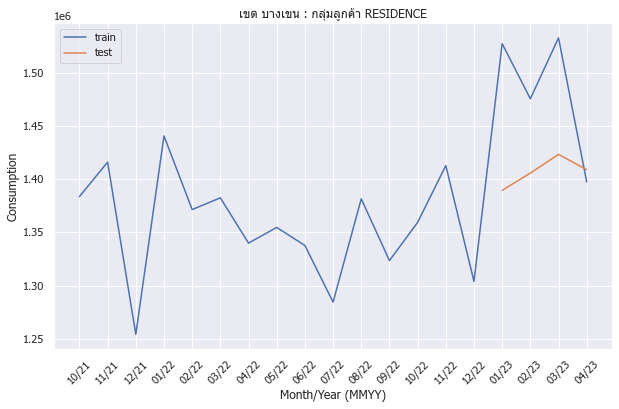

5.4364026793369495
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 9 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.713 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:19:09.428: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:19:09.626: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:09.627: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:19:09.627: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

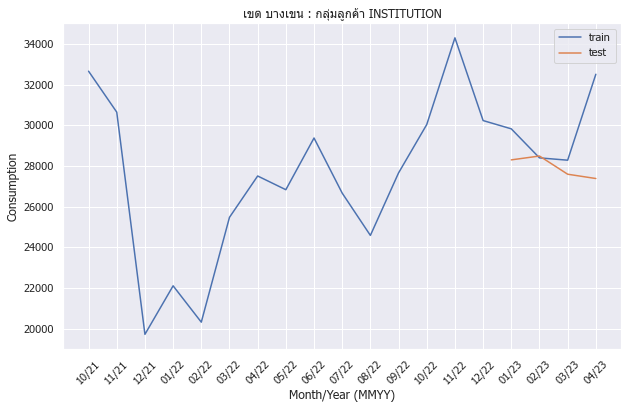

5.910095511022292
-----ALL MAPE:::: 12.649096618962192


In [178]:
# pv_keys = dataset_lag.keys()
pv_sample =['กรุงเทพมหานคร']
ap_sample = ['ดุสิต','หนองจอก','บางเขน']
all_mape = []
for p, pv in enumerate(pv_sample):
    # ap_keys = dataset_lag[pv].keys()
    for a, ap in enumerate(ap_sample):
        cs_names = dataset_lag[pv][ap].keys()
        for c, cs in enumerate(cs_names):
            # h2o_df = h2o.H2OFrame(dataset_lag[pv][ap][cs])
            # train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
            # print("train, test",train, test)
            df_train = dataset_lag[pv][ap][cs].loc[:int(len(dataset_lag[pv][ap][cs])*0.8)-1,:]
            df_test = dataset_lag[pv][ap][cs].loc[int(len(dataset_lag[pv][ap][cs])*0.8):,:]
            mape = auto_ml(df_train, df_test, dataset_lag[pv][ap][cs],ap,cs)
            all_mape.append(mape)

print("-----ALL MAPE::::",sum(all_mape)/len(all_mape))

In [210]:
import h2o
from h2o.automl import H2OAutoML
np.random.seed(3)

# Start the H2O cluster (locally)
def auto_ml(df_train, df_test, df_sample,ap,cs,X_scaler):
    h2o.init()
    # Import a sample binary outcome train/test set into H2O
    train = h2o.H2OFrame(df_train[['x0','x1','x2','y']])
    test = h2o.H2OFrame(df_test[['x0','x1','x2','y']])

    # Identify predictors and response
    x = train.columns
    y = "y"
    x.remove(y)

    # Run AutoML for 20 base models
    # aml = H2OAutoML(max_models=20, seed=30, max_runtime_secs = 120,include_algos = ["GLM", "DRF", "GBM","StackedEnsemble"])
    aml = H2OAutoML(max_models=10, seed=30, max_runtime_secs = 120)
    aml.train(x=x, y=y, training_frame=train, leaderboard_frame = test)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)
    
    leader_model = aml.leader
    test_predict = leader_model.predict(test)
    df_results = pd.DataFrame()
    print("df_test",df_test)
    label_scale = df_test['y'].reset_index(drop=True).to_numpy()
    df_results = pd.DataFrame()
    df_results['ground_truth'] = X_scaler.inverse_transform(label_scale.reshape(-1, 1)).reshape(-1)
    y_pred_scaled = h2o.as_list(test_predict,use_pandas=True)
    # Inverse transform the scaled predictions to the original scale
    df_results['predictions']  = X_scaler.inverse_transform(y_pred_scaled)
    df_sample['y']  = X_scaler.inverse_transform(df_sample['y'].to_numpy().reshape(-1, 1)).reshape(-1)
    y_pred_scaled = h2o.as_list(test_predict,use_pandas=True) 
    print(df_results.head())

    plt.figure(figsize=(10, 6))
    # plt.plot(df_sample.index,df_sample['y'])
    plt.plot(df_sample['MMYY'],df_sample['y'])
    # plt.plot(df_test.index,df_results['predictions'])
    plt.plot(df_test['MMYY'],df_results['predictions'])
    plt.legend(['train','test'])
    plt.tick_params(axis='x', labelrotation=45)
    plt.xlabel('Month/Year (MMYY)')
    plt.ylabel('Consumption')
    plt.title(f'เขต {ap} : กลุ่มลูกค้า {cs}')
    plt.show()

    # def mape(a, b):
    #     mask = a != 0
    #     return (abs(a-b)/a)[mask].mean()
    # mape_score = mape(df_results['ground_truth'],df_results['predictions'])*100
    # print("MAPE:",mape_score)

    mape_score = mean_absolute_percent_error(df_results['ground_truth'],df_results['predictions'])
    print(mape_score)
    
    return(mape_score)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 43 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.689 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:29.873: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:53:29.993: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:29.993: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:29.994: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    mean

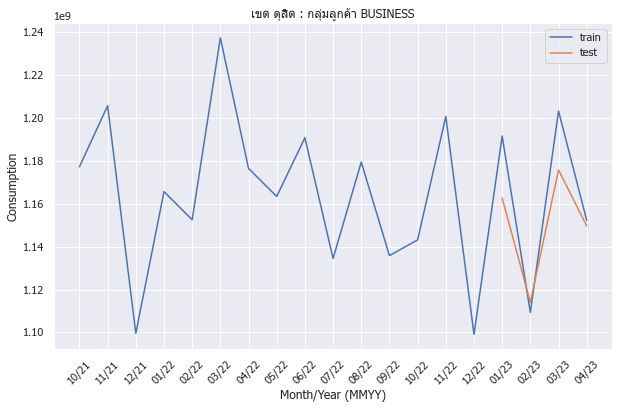

1.3417719826869479
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 43 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.684 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:35.406: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:35.625: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:35.625: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:35.625: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse               mse       mae      rmsle    

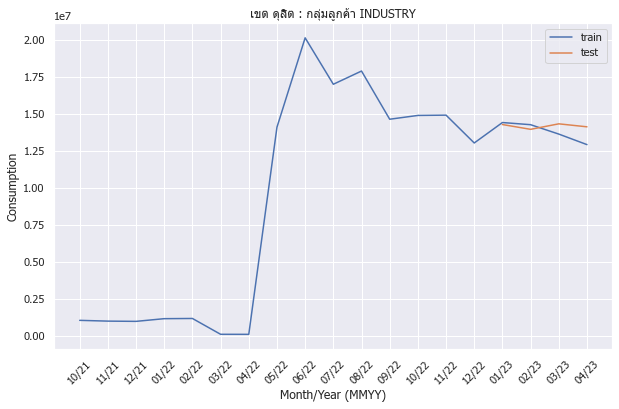

4.383679960370117
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 43 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.683 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:40.271: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:40.474: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:40.475: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:40.475: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse               mse        mae      rmsle   

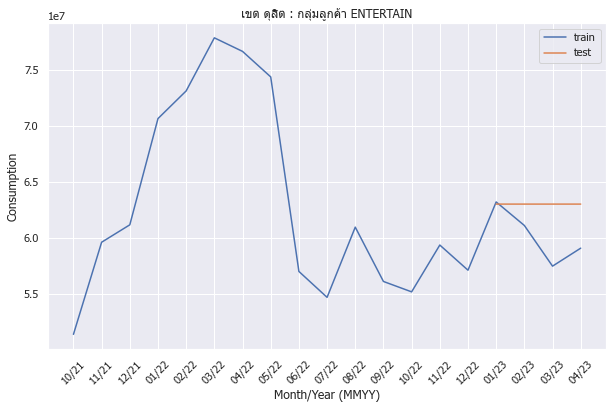

4.922188429825539
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 43 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.679 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:45.45: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:45.222: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:45.223: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:45.223: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_r

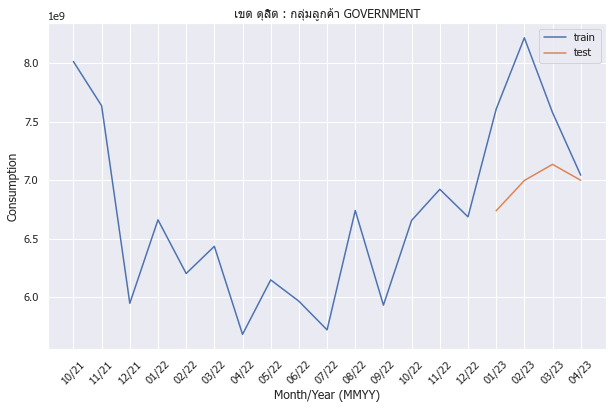

8.17321296639898
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.675 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:50.29: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:50.207: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:50.207: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:50.207: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_r

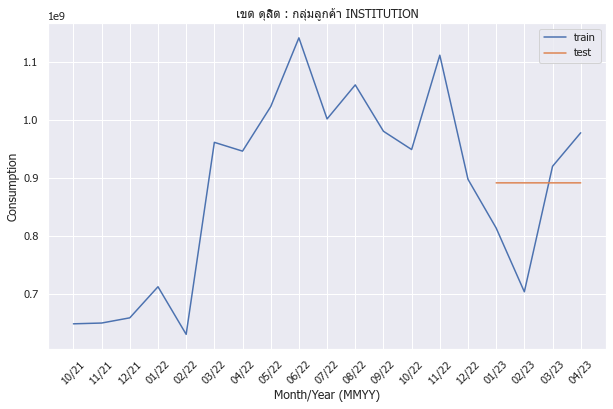

12.036275772881158
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.668 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:54.803: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:54.931: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:54.932: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:54.932: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse              mse       mae     rmsle    me

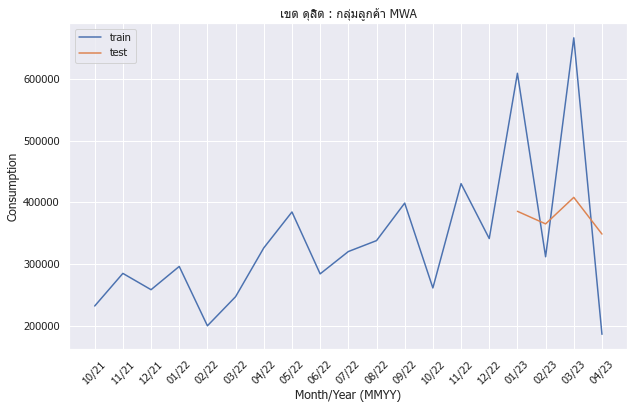

44.98483443467924
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.668 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:53:59.744: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:53:59.901: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:59.904: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:53:59.904: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse          mse       mae     rmsle    mean_re

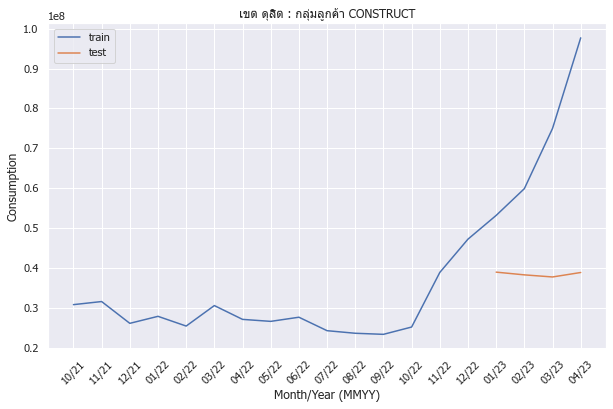

43.12209676312977
Checking whether there is an H2O instance running at http://localhost:54321.

<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

 connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.662 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:04.783: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:04.990: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:04.990: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:04.991: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae        rmsle    m

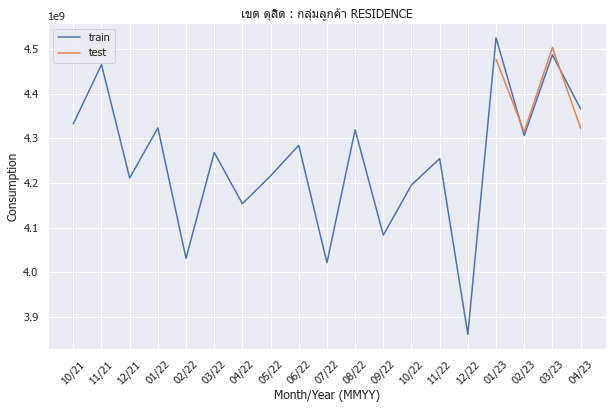

0.654748357643886
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.662 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:09.613: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:09.788: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:09.788: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:09.788: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    me

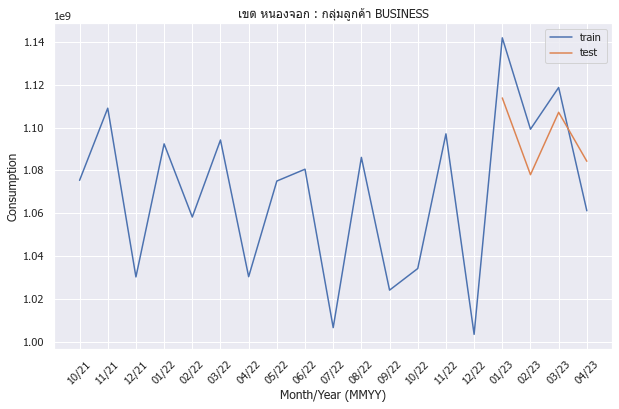

1.899101691759977
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.658 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:15.271: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.
00:54:15.421: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:15.422: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:15.422: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    mean

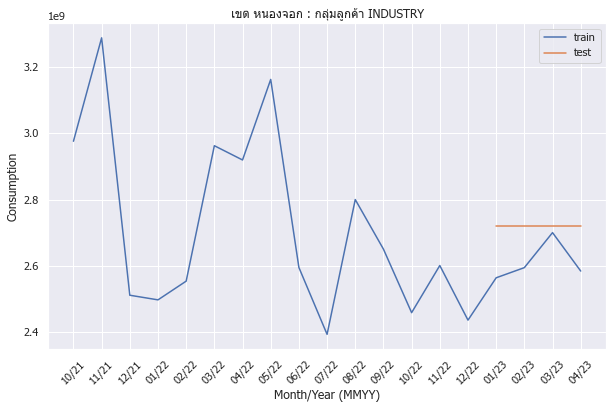

4.238264040370167
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.653 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:20.978: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:21.251: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:21.252: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:21.252: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse          mse      mae     rmsle    mean_res

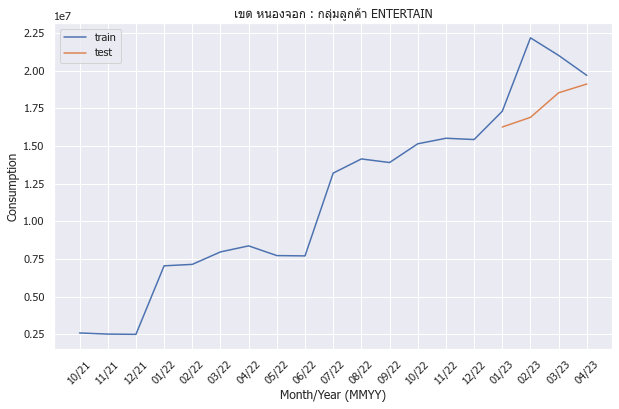

11.134181396604653
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.644 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:26.96: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:26.505: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:26.506: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:26.507: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse          mse        mae       rmsle    mea

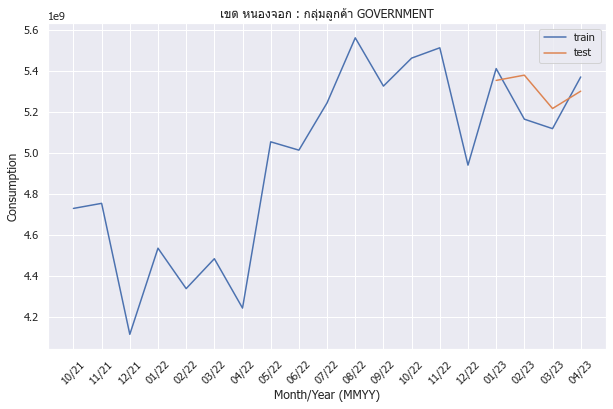

2.1083482473038133
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.641 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:31.636: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.

█
00:54:32.179: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:32.180: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:32.181: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae     rmsle    mean_r

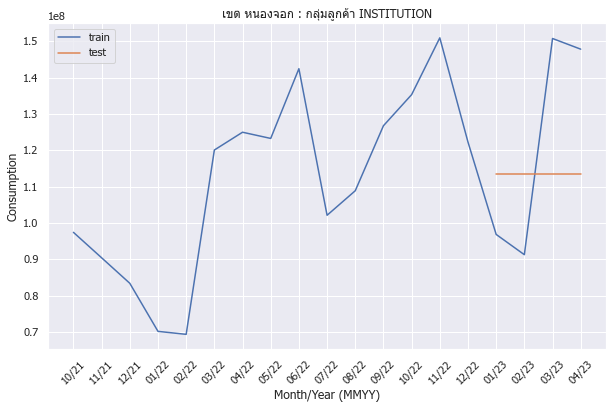

22.363975368909742
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.639 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:37.532: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:37.857: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:37.858: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:37.858: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

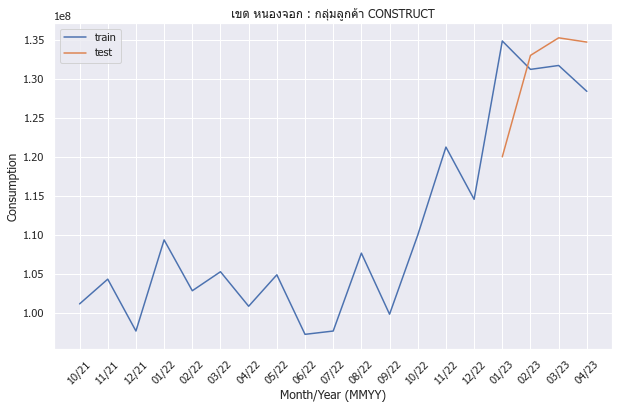

4.995452042928131
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 44 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.636 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:43.914: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:54:44.281: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:44.282: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:44.282: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                              rmse          mse               mae    

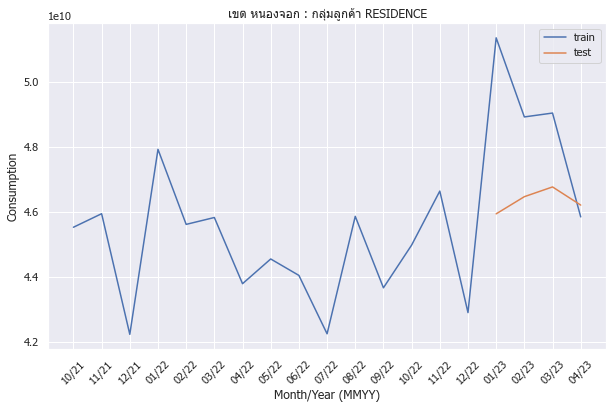

5.2570007349280905


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_scaled['y'].loc[:] = X_scaler.transform(df_test['y'].to_numpy().reshape(-1, 1)).reshape(-1)


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.626 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:54:55.559: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.

█
00:54:56.154: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:56.155: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:54:56.156: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                       rmse         mse        mae      rmsle    mean

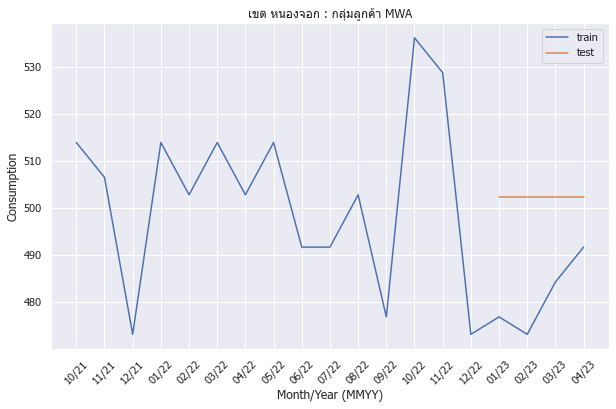

4.360538808578839
Checking whether there is an H2O instance running at http://localhost:54321.

<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

 connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.624 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
00:55:08.811: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:09.555: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:09.556: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:09.556: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

█████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

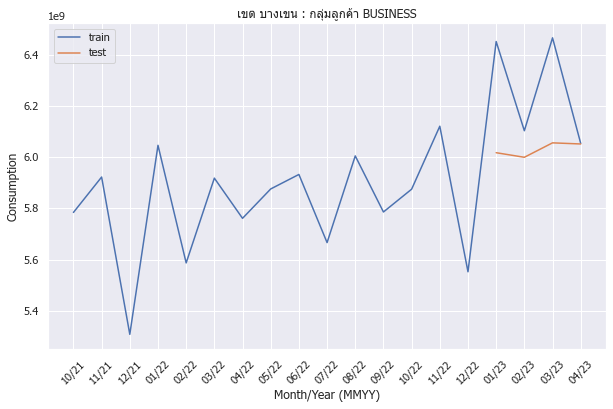

3.697301331744063
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.629 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:16.828: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:17.18: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:17.19: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:17.19: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse        mae      rmsle    mean_re

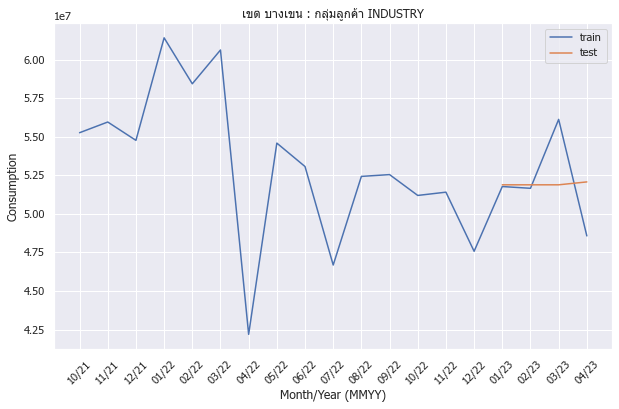

3.854126317604684
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.618 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:22.706: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:22.896: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:22.897: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:22.898: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

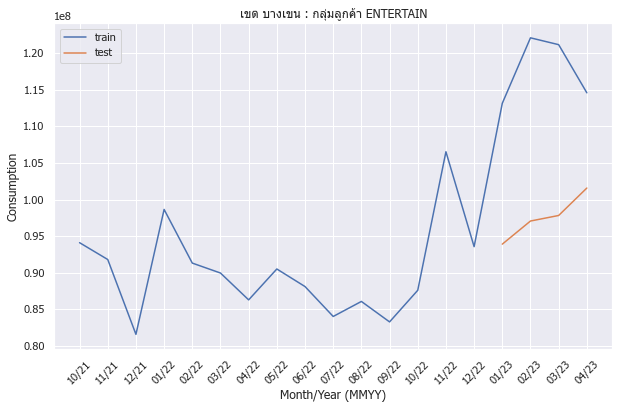

17.047157757023733
Checking whether there is an H2O instance running at http://localhost:54321. connected.

<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.618 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:27.546: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:27.726: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:27.726: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:27.727: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae       rmsle    mean

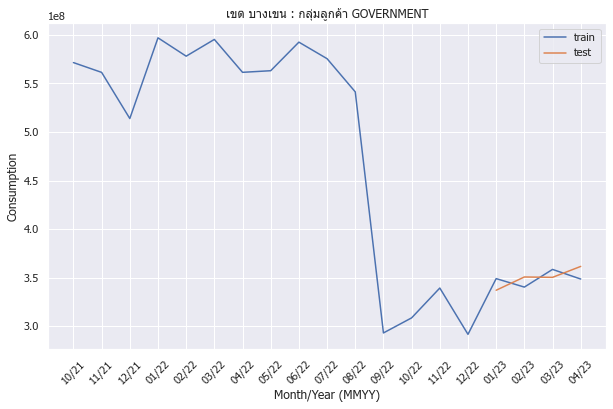

3.1251343351137453
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.615 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:33.718: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:33.898: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:33.899: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:33.899: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

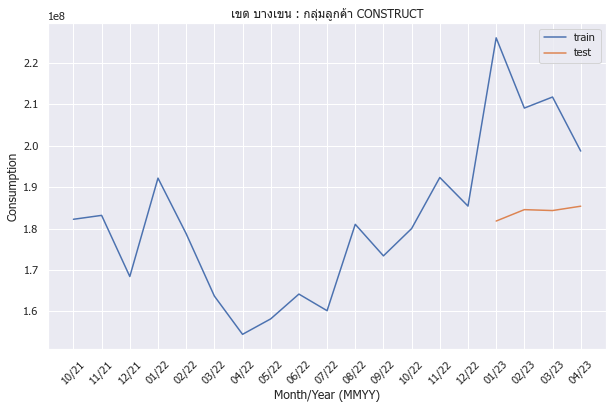

12.742322020175582
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.613 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:39.429: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:39.608: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:39.608: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:39.609: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse        mse       mae     rmsle    mean_res

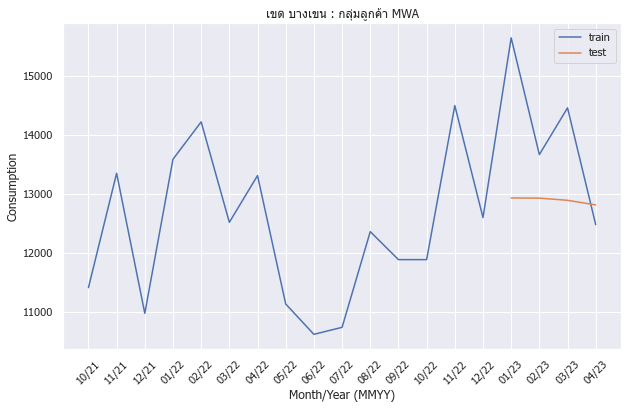

9.069093413036958
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 45 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.612 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:44.552: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:44.729: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:44.730: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:44.730: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                              rmse          mse               mae    

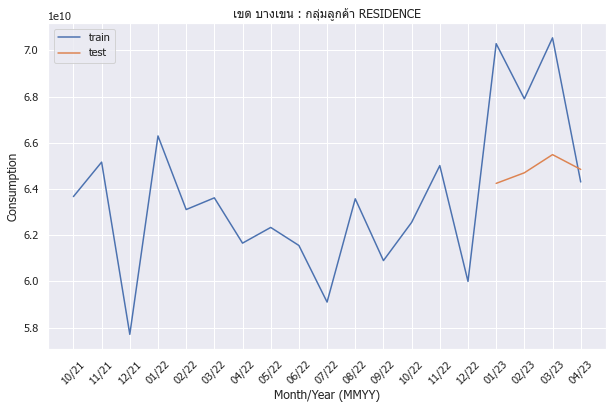

5.333674104633082
Checking whether there is an H2O instance running at http://localhost:54321. connected.


<ipython-input-211-e14139b0933d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
<ipython-input-211-e14139b0933d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

--------------------------  -------------------------------
H2O_cluster_uptime:         2 hours 46 mins
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_siripatt_55p6u8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.610 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:55:50.320: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 15.0.


00:55:50.630: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:50.631: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.
00:55:50.631: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 15.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse          mse       mae      rmsle    mean_

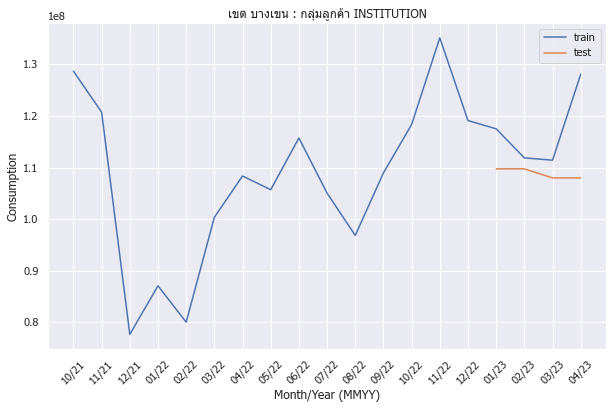

6.8100275151810346
-----ALL MAPE:::: 9.902271158062996


In [211]:
# pv_keys = dataset_lag.keys()
pv_sample =['กรุงเทพมหานคร']
ap_sample = ['ดุสิต','หนองจอก','บางเขน']
all_mape = []
for p, pv in enumerate(pv_sample):
    # ap_keys = dataset_lag[pv].keys()
    for a, ap in enumerate(ap_sample):
        cs_names = dataset_lag[pv][ap].keys()
        for c, cs in enumerate(cs_names):
            # h2o_df = h2o.H2OFrame(dataset_lag[pv][ap][cs])
            # train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
            # print("train, test",train, test)
            df_train = dataset_lag[pv][ap][cs].loc[:int(len(dataset_lag[pv][ap][cs])*0.8)-1,:]
            df_test = dataset_lag[pv][ap][cs].loc[int(len(dataset_lag[pv][ap][cs])*0.8):,:]
            
            # Create a StandardScaler for both X and y
            X_scaler = StandardScaler()

            # Fit the scalers on the training data and transform it
            df_train_scaled = df_train.copy()
            X_scaler.fit(df_train['x0'].to_numpy().reshape(-1, 1))
            df_train_scaled['x0'].loc[:] = X_scaler.transform(df_train['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_train_scaled['x1'].loc[:] = X_scaler.transform(df_train['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_train_scaled['x2'].loc[:] = X_scaler.transform(df_train['x2'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_train_scaled['y'].loc[:] = X_scaler.transform(df_train['y'].to_numpy().reshape(-1, 1)).reshape(-1)

            # Transform the testing data using the fitted scalers
            df_test_scaled = df_test.copy()
            df_test_scaled['x0'].loc[:] = X_scaler.transform(df_test['x0'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_test_scaled['x1'].loc[:] = X_scaler.transform(df_test['x1'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_test_scaled['x2'].loc[:] = X_scaler.transform(df_test['x2'].to_numpy().reshape(-1, 1)).reshape(-1)
            df_test_scaled['y'].loc[:] = X_scaler.transform(df_test['y'].to_numpy().reshape(-1, 1)).reshape(-1)


            mape = auto_ml(df_train, df_test, dataset_lag[pv][ap][cs],ap,cs,X_scaler)
            all_mape.append(mape)

print("-----ALL MAPE::::",sum(all_mape)/len(all_mape))

In [113]:
pv_sample =['กรุงเทพมหานคร']
ap_sample = ['ดุสิต','หนองจอก','บางเขน']

# Extract the features (x0, x1, x2) and target variable (y)
for p,pv in enumerate(pv_sample):
    for a,ap in enumerate(ap_sample):
        cs_names = dataset[pv][ap].keys()
        for c, cs in enumerate(cs_names):

            X = dataset[pv][ap][cs][['x']]
            y = dataset[pv][ap][cs]['y']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)
            print(X_train, X_test, y_train, y_test )
            break

         x
0   189045
1   196369
2   191201
3   193321
4   198800
5   178377
6   191092
7   188567
8   204889
9   193173
10  190656
11  195925
12  185096
13  193741
14  185352
15  186761          x
16  197838
17  178287
18  201750
19  192420
20  203075 0     196369.0
1     191201.0
2     193321.0
3     198800.0
4     178377.0
5     191092.0
6     188567.0
7     204889.0
8     193173.0
9     190656.0
10    195925.0
11    185096.0
12    193741.0
13    185352.0
14    186761.0
15    197838.0
Name: y, dtype: float64 16    178287.0
17    201750.0
18    192420.0
19    203075.0
20    197289.0
Name: y, dtype: float64
         x
0   173540
1   185754
2   186810
3   187262
4   193124
5   179417
6   190226
7   184283
8   190538
9   179436
10  187206
11  188167
12  175298
13  189127
14  178344
15  180099          x
16  191039
17  174753
18  198839
19  191416
20  194805 0     185754.0
1     186810.0
2     187262.0
3     193124.0
4     179417.0
5     190226.0
6     184283.0
7     190538.0
8     17943

In [ ]:
pv_keys = dataset_lag.keys()
for p, pv in enumerate(pv_keys):
    ap_keys = dataset_lag[pv].keys()
    for a, ap in enumerate(ap_keys):
        cs_names = dataset_lag[pv][ap].keys()
        for c, cs in enumerate(cs_names):
            dataset_lag[pv][ap][cs]
            
            h2o.init()
            h2o_df = h2o.H2OFrame(dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE'])
            x = ['x0', 'x1', 'x2']
            y = 'y'
            train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
            aml = H2OAutoML(max_models=10, seed=123)
            aml.train(x=x, y=y, training_frame=train)
            best_model = aml.leader
            predictions = best_model.predict(test)
            aml.leaderboard
        print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')